# EDA Project

## Topic: Crypto Currencies

### Website used for the data required in the Project
**https://finance.yahoo.com/markets/crypto/all/?start=300&count=100**

### Problem Statement
**Analyse different types of crypto currencies available in the current market and draw insights on the basis of their Prices, Market Cap values and various other parameters to determine the top & trending currencies floating in the market and understand the reasons behind the trend.**

#### Importing necessary Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#### Extracting data using Selenium

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://finance.yahoo.com/markets/crypto/all/?start=300&count=100")

In [4]:
html = driver.page_source

In [5]:
soup = BeautifulSoup(html)

In [6]:
for i in soup.find_all('td',{"class" : "yf-1dbt8wv"}):
    print(i.text)

 STORJ-USD  Storj USD  
0.445561 +0.033743 (+8.19%) 
+0.033743 
+8.19% 
  
174.76M 
24.73M 
24.73M 
24.73M 
392.226M 
2.91% 
 
C CAT32724-USD  Simon's Cat USD  
0.000026 +0.000001 (+6.14%) 
+0.000001 
+6.14% 
  
172.64M 
22.929M 
22.929M 
22.929M 
6.75T 
- 
 
 INF-USD  INFAM USD  
181.22 +4.97 (+2.82%) 
+4.97 
+2.82% 
  
172.107M 
2.55M 
2.55M 
2.55M 
949,691 
-23.28% 
 
 CFG-USD  Centrifuge USD  
0.341568 +0.005839 (+1.74%) 
+0.005839 
+1.74% 
  
171.551M 
361,275 
361,275 
361,275 
502.247M 
6.10% 
 
 LRC-USD  Loopring USD  
0.124307 +0.004817 (+4.03%) 
+0.004817 
+4.03% 
  
169.904M 
6.244M 
6.244M 
6.244M 
1.367B 
-29.29% 
 
 TRB-USD  Tellor USD  
64.65 +2.64 (+4.26%) 
+2.64 
+4.26% 
  
169.373M 
18.655M 
18.655M 
18.655M 
2.62M 
16.81% 
 
 PAAL-USD  PAAL AI USD  
0.204911 +0.012940 (+6.74%) 
+0.012940 
+6.74% 
  
167.93M 
1.594M 
1.594M 
1.594M 
819.528M 
499.32% 
 
 YFI-USD  yearn.finance USD  
4,982.28 +69.82 (+1.42%) 
+69.82 
+1.42% 
  
167.184M 
11.889M 
11.889M 
11.889M 
33,5

In [7]:
data =""" BTC-USD Bitcoin USD  
62,024.28 -87.45 (-0.14%) 
-87.45 
-0.14% 
  
1.226T 
15.596B 
15.596B 
15.596B 
19.763M 
121.92% 
 
 ETH-USD Ethereum USD  
2,409.75 -8.95 (-0.37%) 
-8.95 
-0.37% 
  
290.074B 
8.529B 
8.529B 
8.529B 
120.375M 
47.74% 
 
 USDT-USD Tether USDt USD  
0.999998 +0.000125 (+0.01%) 
+0.000125 
+0.01% 
  
119.642B 
31.79B 
31.79B 
31.79B 
119.642B 
-0.04% 
 
 BNB-USD BNB USD  
563.70 +9.17 (+1.65%) 
+9.17 
+1.65% 
  
82.261B 
1.425B 
1.425B 
1.425B 
145.932M 
161.52% 
 
 SOL-USD Solana USD  
142.71 -0.42 (-0.29%) 
-0.42 
-0.29% 
  
66.874B 
1.238B 
1.238B 
1.238B 
468.598M 
514.81% 
 
 USDC-USD USD Coin USD  
1.0000 +0.0000 (+0.00%) 
+0.0000 
+0.00% 
  
35.568B 
3.175B 
3.175B 
3.175B 
35.567B 
0.01% 
 
 XRP-USD XRP USD  
0.528264 -0.004226 (-0.79%) 
-0.004226 
-0.79% 
  
29.881B 
761.318M 
761.318M 
761.318M 
56.564B 
2.38% 
 
 STETH-USD Lido Staked ETH USD  
2,408.35 -16.79 (-0.69%) 
-16.79 
-0.69% 
  
23.62B 
18.28M 
18.28M 
18.28M 
9.807M 
47.43% 
 
 DOGE-USD Dogecoin USD  
0.109293 +0.000385 (+0.35%) 
+0.000385 
+0.35% 
  
15.983B 
420.015M 
420.015M 
420.015M 
146.243B 
77.80% 
 
 WTRX-USD Wrapped TRON USD  
0.153879 -0.002929 (-1.87%) 
-0.002929 
-1.87% 
  
13.453B 
9.976M 
9.976M 
9.976M 
87.423B 
77.97% 
 
 TON11419-USD Toncoin USD  
5.2970 -0.0972 (-1.80%) 
-0.0972 
-1.80% 
  
13.429B 
132.04M 
132.04M 
132.04M 
2.535B 
161.73% 
 
 TRX-USD TRON USD  
0.153761 -0.002896 (-1.85%) 
-0.002896 
-1.85% 
  
13.313B 
205.7M 
205.7M 
205.7M 
86.585B 
77.59% 
 
 ADA-USD Cardano USD  
0.350326 -0.002457 (-0.70%) 
-0.002457 
-0.70% 
  
12.246B 
157.795M 
157.795M 
157.795M 
34.956B 
35.81% 
 
 WSTETH-USD Lido wstETH USD  
2,847.95 +9.06 (+0.32%) 
+9.06 
+0.32% 
  
10.448B 
12.287M 
12.287M 
12.287M 
3.668M 
52.97% 
 
 AVAX-USD Avalanche USD  
25.63 -0.66 (-2.50%) 
-0.66 
-2.50% 
  
10.417B 
210.792M 
210.792M 
210.792M 
406.445M 
153.22% 
 
 SHIB-USD Shiba Inu USD  
0.000017 -0.000000 (-0.93%) 
-0.000000 
-0.93% 
  
10.234B 
322.898M 
322.898M 
322.898M 
589.267T 
142.86% 
 
 WBTC-USD Wrapped Bitcoin USD  
61,960.53 -15.95 (-0.03%) 
-15.95 
-0.03% 
  
9.374B 
46.358M 
46.358M 
46.358M 
151,286 
121.84% 
 
 WETH-USD WETH USD  
2,408.82 -14.84 (-0.61%) 
-14.84 
-0.61% 
  
8.131B 
365.66M 
365.66M 
365.66M 
3.375M 
47.94% 
 
 LINK-USD Chainlink USD  
11.29 +0.16 (+1.41%) 
+0.16 
+1.41% 
  
7.078B 
181.192M 
181.192M 
181.192M 
626.85M 
46.94% 
 
 BCH-USD Bitcoin Cash USD  
321.50 -3.06 (-0.94%) 
-3.06 
-0.94% 
  
6.356B 
139.291M 
139.291M 
139.291M 
19.77M 
40.98% 
 
 DOT-USD Polkadot USD  
4.1424 -0.0463 (-1.10%) 
-0.0463 
-1.10% 
  
6.222B 
96.84M 
96.84M 
96.84M 
1.502B 
3.38% 
 
 NEAR-USD NEAR Protocol USD  
4.6856 -0.1355 (-2.81%) 
-0.1355 
-2.81% 
  
5.684B 
150.472M 
150.472M 
150.472M 
1.213B 
342.17% 
 
 LEO-USD UNUS SED LEO USD  
5.9080 -0.0063 (-0.11%) 
-0.0063 
-0.11% 
  
5.467B 
359,754 
359,754 
359,754 
925.308M 
54.10% 
 
 DAI-USD Dai USD  
0.999900 +0.000015 (+0.00%) 
+0.000015 
+0.00% 
  
5.365B 
54.441M 
54.441M 
54.441M 
5.365B 
0.01% 
 
 LTC-USD Litecoin USD  
65.98 +1.10 (+1.69%) 
+1.10 
+1.69% 
  
4.952B 
174.152M 
174.152M 
174.152M 
75.05M 
-0.83% 
 
 SUI20947-USD Sui USD  
1.7531 -0.0081 (-0.46%) 
-0.0081 
-0.46% 
  
4.845B 
523.895M 
523.895M 
523.895M 
2.764B 
300.06% 
 
 APT21794-USD Aptos USD  
8.7784 -0.4618 (-5.00%) 
-0.4618 
-5.00% 
  
4.413B 
197.566M 
197.566M 
197.566M 
502.724M 
72.48% 
 
 EETH-USD ether.fi Staked ETH USD  
2,404.71 -19.99 (-0.82%) 
-19.99 
-0.82% 
  
4.231B 
168,184 
168,184 
168,184 
1.759M 
8.95% 
 
 TAO22974-USD Bittensor USD  
572.28 +7.94 (+1.41%) 
+7.94 
+1.41% 
  
4.224B 
152.313M 
152.313M 
152.313M 
7.381M 
1,047.35% 
 
 UNI7083-USD Uniswap USD  
6.8613 +0.1105 (+1.64%) 
+0.1105 
+1.64% 
  
4.119B 
84.627M 
84.627M 
84.627M 
600.295M 
53.67% 
 
 BTCB-USD Bitcoin BEP2 USD  
62,059.46 -29.19 (-0.05%) 
-29.19 
-0.05% 
  
4.042B 
9.374M 
9.374M 
9.374M 
65,133 
122.47% 
 
 WEETH-USD Wrapped eETH USD  
2,527.50 -5.79 (-0.23%) 
-5.79 
-0.23% 
  
4.025B 
23.908M 
23.908M 
23.908M 
1.592M 
9.60% 
 
 PEPE24478-USD Pepe USD  
0.00000943 +0.00000007 (+0.71%) 
+0.00000007 
+0.71% 
  
3.967B 
694.546M 
694.546M 
694.546M 
420.69T 
800.00% 
 
 ICP-USD Internet Computer USD  
8.1815 -0.1759 (-2.10%) 
-0.1759 
-2.10% 
  
3.859B 
41.609M 
41.609M 
41.609M 
471.628M 
170.31% 
 
 KAS-USD Kaspa USD  
0.148311 -0.000305 (-0.21%) 
-0.000305 
-0.21% 
  
3.685B 
19.7M 
19.7M 
19.7M 
24.849B 
199.85% 
 
 WBETH-USD Wrapped Beacon ETH USD  
2,531.36 -8.63 (-0.34%) 
-8.63 
-0.34% 
  
3.603B 
13.138M 
13.138M 
13.138M 
1.423M 
52.46% 
 
 FET-USD Artificial Superintelligence Alliance USD  
1.4132 -0.0396 (-2.72%) 
-0.0396 
-2.72% 
  
3.561B 
137.108M 
137.108M 
137.108M 
2.52B 
564.31% 
 
 POL28321-USD POL (ex-MATIC) USD  
0.378844 -0.005160 (-1.34%) 
-0.005160 
-1.34% 
  
2.865B 
60.176M 
60.176M 
60.176M 
7.562B 
-40.77% 
 
R RENDER-USD Render USD  
5.4918 -0.2723 (-4.72%) 
-0.2723 
-4.72% 
  
2.843B 
197.517M 
197.517M 
197.517M 
517.691M 
- 
 
 XMR-USD Monero USD  
152.33 +5.25 (+3.57%) 
+5.25 
+3.57% 
  
2.81B 
50.848M 
50.848M 
50.848M 
18.447M 
-4.14% 
 
 ETC-USD Ethereum Classic USD  
18.62 -0.19 (-1.00%) 
-0.19 
-1.00% 
  
2.774B 
68.901M 
68.901M 
68.901M 
149.017M 
19.90% 
 
 XLM-USD Stellar USD  
0.091717 +0.000707 (+0.78%) 
+0.000707 
+0.78% 
  
2.722B 
33.851M 
33.851M 
33.851M 
29.679B 
-17.41% 
 
 STX4847-USD Stacks USD  
1.7895 -0.1886 (-9.54%) 
-0.1886 
-9.54% 
  
2.67B 
114.975M 
114.975M 
114.975M 
1.492B 
262.63% 
 
 FDUSD-USD First Digital USD USD  
0.999436 +0.000404 (+0.04%) 
+0.000404 
+0.04% 
  
2.615B 
2.651B 
2.651B 
2.651B 
2.616B 
-0.08% 
 
 USDE29470-USD Ethena USDe USD  
0.999185 -0.000614 (-0.06%) 
-0.000614 
-0.06% 
  
2.534B 
51.734M 
51.734M 
51.734M 
2.536B 
-0.22% 
 
 OKB-USD OKB USD  
41.52 +0.08 (+0.19%) 
+0.08 
+0.19% 
  
2.491B 
1.118M 
1.118M 
1.118M 
60M 
-3.16% 
 
 IMX10603-USD Immutable USD  
1.5244 -0.0347 (-2.23%) 
-0.0347 
-2.23% 
  
2.447B 
28.202M 
28.202M 
28.202M 
1.605B 
177.94% 
 
 WIF-USD dogwifhat USD  
2.2794 -0.0369 (-1.59%) 
-0.0369 
-1.59% 
  
2.277B 
373.469M 
373.469M 
373.469M 
998.845M 
1,459.17% 
 
 AAVE-USD Aave USD  
148.02 -3.58 (-2.36%) 
-3.58 
-2.36% 
  
2.213B 
139.749M 
139.749M 
139.749M 
14.951M 
126.63% 
 
 FIL-USD Filecoin USD  
3.6243 -0.0095 (-0.26%) 
-0.0095 
-0.26% 
  
2.142B 
80.519M 
80.519M 
80.519M 
590.88M 
5.72% 
 
 CRO-USD Cronos USD  
0.080085 -0.000554 (-0.69%) 
-0.000554 
-0.69% 
  
2.128B 
3.45M 
3.45M 
3.45M 
26.572B 
60.06% 
 
 OP-USD Optimism USD  
1.6087 +0.0094 (+0.58%) 
+0.0094 
+0.58% 
  
2.019B 
104.994M 
104.994M 
104.994M 
1.255B 
24.32% 
 
 HBAR-USD Hedera USD  
0.053153 -0.000884 (-1.64%) 
-0.000884 
-1.64% 
  
2.001B 
34.902M 
34.902M 
34.902M 
37.653B 
13.51% 
 
 ARB11841-USD Arbitrum USD  
0.551922 -0.009992 (-1.78%) 
-0.009992 
-1.78% 
  
1.996B 
135.574M 
135.574M 
135.574M 
3.617B 
-35.01% 
 
 INJ-USD Injective USD  
19.93 -0.45 (-2.21%) 
-0.45 
-2.21% 
  
1.947B 
51.913M 
51.913M 
51.913M 
97.698M 
162.00% 
 
 MNT27075-USD Mantle USD  
0.590903 +0.000571 (+0.10%) 
+0.000571 
+0.10% 
  
1.93B 
46.183M 
46.183M 
46.183M 
3.267B 
49.77% 
 
 JITOSOL-USD Jito Staked SOL USD  
162.83 -0.48 (-0.29%) 
-0.48 
-0.29% 
  
1.9B 
20.717M 
20.717M 
20.717M 
11.666M 
559.43% 
 
 VET-USD VeChain USD  
0.022494 -0.000210 (-0.92%) 
-0.000210 
-0.92% 
  
1.822B 
10.713M 
10.713M 
10.713M 
80.985B 
33.99% 
 
 ATOM-USD Cosmos USD  
4.6325 +0.0379 (+0.83%) 
+0.0379 
+0.83% 
  
1.811B 
60.638M 
60.638M 
60.638M 
390.934M 
-33.72% 
 
 FTM-USD Fantom USD  
0.611834 -0.028031 (-4.38%) 
-0.028031 
-4.38% 
  
1.715B 
150.273M 
150.273M 
150.273M 
2.804B 
227.22% 
 
 RUNE-USD THORChain USD  
4.7716 -0.0073 (-0.15%) 
-0.0073 
-0.15% 
  
1.607B 
85.226M 
85.226M 
85.226M 
336.701M 
174.90% 
 
 GRT6719-USD The Graph USD  
0.158023 -0.000564 (-0.36%) 
-0.000564 
-0.36% 
  
1.509B 
33.778M 
33.778M 
33.778M 
9.549B 
86.22% 
 
 BONK-USD Bonk USD  
0.000021 -0.000001 (-4.47%) 
-0.000001 
-4.47% 
  
1.492B 
172.644M 
172.644M 
172.644M 
71.249T 
4,000.00% 
 
 BGB-USD Bitget Token USD  
1.0618 +0.0391 (+3.82%) 
+0.0391 
+3.82% 
  
1.486B 
47.271M 
47.271M 
47.271M 
1.4B 
123.98% 
 
 SEI-USD Sei USD  
0.409860 -0.013514 (-3.19%) 
-0.013514 
-3.19% 
  
1.445B 
134.538M 
134.538M 
134.538M 
3.525B 
257.71% 
 
 RETH-USD Rocket Pool ETH USD  
2,699.17 -0.77 (-0.03%) 
-0.77 
-0.03% 
  
1.329B 
3.328M 
3.328M 
3.328M 
492,308 
52.12% 
 
 THETA-USD Theta Network USD  
1.2916 +0.0169 (+1.33%) 
+0.0169 
+1.33% 
  
1.292B 
14.808M 
14.808M 
14.808M 
1B 
106.95% 
 
 PUFETH-USD pufETH USD  
2,424.50 -6.13 (-0.25%) 
-6.13 
-0.25% 
  
1.279B 
3.164M 
3.164M 
3.164M 
527,357 
1.44% 
 
 FLOKI-USD FLOKI USD  
0.000133 -0.000004 (-2.57%) 
-0.000004 
-2.57% 
  
1.275B 
135.069M 
135.069M 
135.069M 
9.595T 
655.56% 
 
 MKR-USD Maker USD  
1,450.61 -7.53 (-0.52%) 
-7.53 
-0.52% 
  
1.272B 
25.127M 
25.127M 
25.127M 
876,911 
3.68% 
 
 SUSDE-USD Ethena Staked USDe USD  
1.1040 +0.0005 (+0.04%) 
+0.0005 
+0.04% 
  
1.237B 
9.527M 
9.527M 
9.527M 
1.121B 
9.13% 
 
 FLZ-USD Fellaz USD  
2.6128 -0.0186 (-0.71%) 
-0.0186 
-0.71% 
  
1.233B 
1.02M 
1.02M 
1.02M 
471.875M 
2.46% 
 
 PYTH-USD Pyth Network USD  
0.336019 +0.007147 (+2.17%) 
+0.007147 
+2.17% 
  
1.218B 
31.473M 
31.473M 
31.473M 
3.625B 
16.93% 
 
 POPCAT28782-USD Popcat (SOL) USD  
1.2363 +0.0984 (+8.64%) 
+0.0984 
+8.64% 
  
1.212B 
150.689M 
150.689M 
150.689M 
979.973M 
6,611.96% 
 
 AR-USD Arweave USD  
18.45 -0.30 (-1.59%) 
-0.30 
-1.59% 
  
1.211B 
28.365M 
28.365M 
28.365M 
65.652M 
366.58% 
 
 METH29035-USD Mantle Staked Ether USD  
2,511.63 -11.08 (-0.44%) 
-11.08 
-0.44% 
  
1.203B 
13.668M 
13.668M 
13.668M 
478,879 
-1.23% 
 
 HNT-USD Helium USD  
6.9915 -0.2533 (-3.50%) 
-0.2533 
-3.50% 
  
1.192B 
7.778M 
7.778M 
7.778M 
170.472M 
396.20% 
 
 OM-USD MANTRA USD  
1.3672 +0.0384 (+2.89%) 
+0.0384 
+2.89% 
  
1.161B 
33.46M 
33.46M 
33.46M 
849.473M 
7,108.61% 
 
 TIA22861-USD Celestia USD  
5.0677 -0.1852 (-3.53%) 
-0.1852 
-3.53% 
  
1.092B 
57.506M 
57.506M 
57.506M 
215.564M 
126.49% 
 
 ZBU-USD Zeebu USD  
4.0860 -0.0096 (-0.23%) 
-0.0096 
-0.23% 
  
1.058B 
33.527M 
33.527M 
33.527M 
258.971M 
337.69% 
 
 ALGO-USD Algorand USD  
0.126011 -0.000694 (-0.55%) 
-0.000694 
-0.55% 
  
1.044B 
16.504M 
16.504M 
16.504M 
8.283B 
25.94% 
 
 JUP29210-USD Jupiter USD  
0.770147 -0.014443 (-1.84%) 
-0.014443 
-1.84% 
  
1.04B 
41.425M 
41.425M 
41.425M 
1.35B 
18.59% 
 
 MATIC-USD Polygon USD  
0.378663 -0.005375 (-1.40%) 
-0.005375 
-1.40% 
  
1.023B 
33.075M 
33.075M 
33.075M 
2.702B 
-31.94% 
 
 WZEDX-USD Wrapped Zedxion USD  
0.252906 -0.001397 (-0.55%) 
-0.001397 
-0.55% 
  
1.013B 
10.081M 
10.081M 
10.081M 
4.007B 
2.82% 
 
 ONDO-USD Ondo USD  
0.706478 -0.006005 (-0.84%) 
-0.006005 
-0.84% 
  
981.834M 
350.973M 
350.973M 
350.973M 
1.39B 
220.33% 
 
 JASMY-USD JasmyCoin USD  
0.019592 -0.000345 (-1.73%) 
-0.000345 
-1.73% 
  
967.76M 
35.048M 
35.048M 
35.048M 
49.395B 
493.57% 
 
 LDO-USD Lido DAO USD  
1.0527 +0.0070 (+0.66%) 
+0.0070 
+0.66% 
  
942.422M 
58.267M 
58.267M 
58.267M 
895.281M 
-32.62% 
 
 KCS-USD KuCoin Token USD  
7.7885 +0.0274 (+0.35%) 
+0.0274 
+0.35% 
  
937.788M 
440,733 
440,733 
440,733 
120.407M 
73.64% 
 
 WLD-USD Worldcoin USD  
1.8103 +0.1223 (+7.24%) 
+0.1223 
+7.24% 
  
909.552M 
181.546M 
181.546M 
181.546M 
502.428M 
6.06% 
 
 BSV-USD Bitcoin SV USD  
45.81 -0.05 (-0.12%) 
-0.05 
-0.12% 
  
905.454M 
23.765M 
23.765M 
23.765M 
19.766M 
29.35% 
 
 BTT-USD BitTorrent(New) USD  
0.00000092 +0.00000001 (+0.95%) 
+0.00000001 
+0.95% 
  
895.146M 
15.947M 
15.947M 
15.947M 
968.246T 
0.00% 
 
 WBNB-USD Wrapped BNB USD  
562.95 +8.49 (+1.53%) 
+8.49 
+1.53% 
  
891.078M 
106.647M 
106.647M 
106.647M 
1.583M 
161.73% 
 
 W-USD Wormhole USD  
0.345096 +0.013723 (+4.14%) 
+0.013723 
+4.14% 
  
889.613M 
238.81M 
238.81M 
238.81M 
2.578B 
-98.70% 
 
 FTT-USD FTX Token USD  
2.6463 +0.3119 (+13.36%) 
+0.3119 
+13.36% 
  
870.363M 
126.958M 
126.958M 
126.958M 
328.895M 
104.36% 
 
 VBNB-USD Venus BNB USD  
13.78 +0.22 (+1.59%) 
+0.22 
+1.59% 
  
857.167M 
857.222M 
857.222M 
857.222M 
62.2M 
46.28% 
 
 QNT-USD Quant USD  
69.66 -0.30 (-0.43%) 
-0.30 
-0.43% 
  
840.999M 
9.934M 
9.934M 
9.934M 
12.073M 
-20.22% 
 
 FLOW-USD Flow USD  
0.546663 +0.002233 (+0.41%) 
+0.002233 
+0.41% 
  
839.722M 
17.531M 
17.531M 
17.531M 
1.536B 
21.89% 
 
 CORE23254-USD Core USD  
0.913321 -0.006226 (-0.68%) 
-0.006226 
-0.68% 
  
834.303M 
23.492M 
23.492M 
23.492M 
913.482M 
126.72% 
 
 BRETT29743-USD Brett (Based) USD  
0.082550 -0.003371 (-3.92%) 
-0.003371 
-3.92% 
  
818.093M 
23.062M 
23.062M 
23.062M 
9.91B 
140.55% 
 
 EZETH-USD Renzo Restaked ETH USD  
2,457.81 +10.70 (+0.44%) 
+10.70 
+0.44% 
  
792.622M 
8.045M 
8.045M 
8.045M 
322,490 
-16.12% 

 BEAM28298-USD Beam USD  
0.015966 -0.000968 (-5.72%) 
-0.000968 
-5.72% 
  
789.786M 
26.299M 
26.299M 
26.299M 
49.466B 
248.68% 
 
 GT-USD GateToken USD  
8.5984 +0.0055 (+0.06%) 
+0.0055 
+0.06% 
  
782.429M 
2.68M 
2.68M 
2.68M 
90.997M 
132.37% 
 
 CFX-USD Conflux USD  
0.171135 -0.004082 (-2.33%) 
-0.004082 
-2.33% 
  
774.43M 
52.532M 
52.532M 
52.532M 
4.525B 
35.44% 
 
 ENA-USD Ethena USD  
0.281418 -0.019450 (-6.46%) 
-0.019450 
-6.46% 
  
773.02M 
73.152M 
73.152M 
73.152M 
2.747B 
-60.46% 
 
 FTN-USD Fasttoken USD  
2.4923 -0.0220 (-0.88%) 
-0.0220 
-0.88% 
  
759.764M 
56.281M 
56.281M 
56.281M 
304.85M 
130.25% 
 
 AERO29270-USD Aerodrome Finance USD  
1.1712 -0.0033 (-0.28%) 
-0.0033 
-0.28% 
  
752.991M 
18.098M 
18.098M 
18.098M 
642.918M 
1,222.09% 
 
 FLR-USD Flare USD  
0.015585 -0.000362 (-2.27%) 
-0.000362 
-2.27% 
  
754.801M 
4.603M 
4.603M 
4.603M 
48.431B 
47.88% 
 
 NOT-USD Notcoin USD  
0.007331 -0.000223 (-2.95%) 
-0.000223 
-2.95% 
  
751.243M 
78.209M 
78.209M 
78.209M 
102.474B 
-1.36% 
 
 USDCE-USD USD Coin Bridged USD  
1.0001 +0.0000 (+0.00%) 
+0.0000 
+0.00% 
  
750.842M 
38.069M 
38.069M 
38.069M 
750.785M 
0.01% 
 
 MSOL-USD Marinade Staked SOL USD  
174.29 -0.34 (-0.19%) 
-0.34 
-0.19% 
  
750.058M 
14.479M 
14.479M 
14.479M 
4.303M 
557.91% 
 
 STRK22691-USD Starknet USD  
0.384167 -0.002429 (-0.63%) 
-0.002429 
-0.63% 
  
745.14M 
39.884M 
39.884M 
39.884M 
1.94B 
-80.22% 
 
 USDD-USD USDD USD  
0.998424 -0.000247 (-0.02%) 
-0.000247 
-0.02% 
  
734.722M 
2.043M 
2.043M 
2.043M 
735.881M 
-0.12% 
 
 CHEEL-USD Cheelee USD  
12.91 -0.02 (-0.15%) 
-0.02 
-0.15% 
  
733.47M 
5.639M 
5.639M 
5.639M 
56.798M 
38.63% 
 
 PYUSD-USD PayPal USD USD  
0.999828 +0.000136 (+0.01%) 
+0.000136 
+0.01% 
  
728.965M 
12.538M 
12.538M 
12.538M 
729.09M 
0.02% 
 
 EOS-USD EOS USD  
0.474120 -0.001416 (-0.30%) 
-0.001416 
-0.30% 
  
720.195M 
40.276M 
40.276M 
40.276M 
1.519B 
-16.46% 
 
 ORDI-USD ORDI USD  
33.43 -0.07 (-0.20%) 
-0.07 
-0.20% 
  
701.935M 
65.516M 
65.516M 
65.516M 
21M 
870.03% 
 
 AXS-USD Axie Infinity USD  
4.6044 -0.0539 (-1.16%) 
-0.0539 
-1.16% 
  
699.8M 
23.8M 
23.8M 
23.8M 
151.984M 
3.42% 
 
 NEO-USD Neo USD  
9.9063 -0.0274 (-0.28%) 
-0.0274 
-0.28% 
  
698.782M 
20.181M 
20.181M 
20.181M 
70.539M 
38.39% 
 
 XEC-USD eCash USD  
0.000035 -0.000001 (-1.84%) 
-0.000001 
-1.84% 
  
695.96M 
14.59M 
14.59M 
14.59M 
19.766T 
44.00% 
 
 CKB-USD Nervos Network USD  
0.015295 -0.000163 (-1.05%) 
-0.000163 
-1.05% 
  
689.368M 
31.004M 
31.004M 
31.004M 
45.072B 
456.12% 
 
 EGLD-USD MultiversX USD  
25.02 -0.06 (-0.26%) 
-0.06 
-0.26% 
  
685.348M 
8.929M 
8.929M 
8.929M 
27.39M 
4.27% 
 
 GALA-USD Gala USD  
0.019543 -0.000249 (-1.26%) 
-0.000249 
-1.26% 
  
681.944M 
46.352M 
46.352M 
46.352M 
34.894B 
306.69% 
 
 XTZ-USD Tezos USD  
0.661634 +0.008723 (+1.34%) 
+0.008723 
+1.34% 
  
664.699M 
9.615M 
9.615M 
9.615M 
1.005B 
-2.75% 
 
 XAUT-USD Tether Gold USD  
2,653.24 +3.76 (+0.14%) 
+3.76 
+0.14% 
  
654.087M 
3.958M 
3.958M 
3.958M 
246,524 
44.60% 
 
 FRAX-USD Frax USD  
0.997085 -0.000093 (-0.01%) 
-0.000093 
-0.01% 
  
647.54M 
7.789M 
7.789M 
7.789M 
649.433M 
-0.11% 
 
 AKT-USD Akash Network USD  
2.5035 -0.0265 (-1.05%) 
-0.0265 
-1.05% 
  
621.578M 
4.541M 
4.541M 
4.541M 
248.286M 
178.81% 
 
 PENDLE-USD Pendle USD  
3.7894 -0.0904 (-2.33%) 
-0.0904 
-2.33% 
  
610.92M 
35.128M 
35.128M 
35.128M 
161.217M 
463.99% 
 
 MINA-USD Mina USD  
0.518675 -0.005786 (-1.10%) 
-0.005786 
-1.10% 
  
604.599M 
16.527M 
16.527M 
16.527M 
1.166B 
33.48% 
 
E EIGEN-USD EigenLayer USD  
3.2313 -0.3844 (-10.63%) 
-0.3844 
-10.63% 
  
602.91M 
185.391M 
185.391M 
185.391M 
186.582M 
- 
 
 SAND-USD The Sandbox USD  
0.251914 -0.000069 (-0.03%) 
-0.000069 
-0.03% 
  
601.882M 
30.04M 
30.04M 
30.04M 
2.389B 
-16.01% 
 
 RSETH-USD Kelp DAO Restaked ETH USD  
2,464.95 -11.81 (-0.48%) 
-11.81 
-0.48% 
  
588.695M 
2.75M 
2.75M 
2.75M 
238,826 
8.27% 
 
 MOG-USD Mog Coin USD  
0.00000150 +0.00000003 (+2.21%) 
+0.00000003 
+2.21% 
  
585.847M 
15.46M 
15.46M 
15.46M 
390.568T 
- 
 
 RON14101-USD Ronin USD  
1.6410 -0.0345 (-2.06%) 
-0.0345 
-2.06% 
  
576.434M 
5.662M 
5.662M 
5.662M 
351.273M 
272.54% 
 
 CHZ-USD Chiliz USD  
0.062699 +0.001141 (+1.85%) 
+0.001141 
+1.85% 
  
571.933M 
27.477M 
27.477M 
27.477M 
9.122B 
3.56% 
 
 1000SATS-USD SATS USD  
0.000266 -0.000003 (-1.27%) 
-0.000003 
-1.27% 
  
559.642M 
38.395M 
38.395M 
38.395M 
2.1T 
-50.91% 
 
 DYDX-USD dYdX (Native) USD  
0.867781 -0.012826 (-1.46%) 
-0.012826 
-1.46% 
  
559.861M 
14.068M 
14.068M 
14.068M 
645.164M 
-57.20% 
 
 MANA-USD Decentraland USD  
0.293406 +0.004571 (+1.58%) 
+0.004571 
+1.58% 
  
559.913M 
24.429M 
24.429M 
24.429M 
1.908B 
-1.52% 
 
 ENS-USD Ethereum Name Service USD  
16.83 -0.19 (-1.11%) 
-0.19 
-1.11% 
  
557.734M 
30.716M 
30.716M 
30.716M 
33.131M 
127.07% 
 
 MSTETH-USD Eigenpie mstETH USD  
2,464.77 +47.70 (+1.97%) 
+47.70 
+1.97% 
  
552.331M 
33,569 
33,569 
33,569 
224,090 
-20.57% 
 
 NEXO-USD Nexo USD  
0.976499 -0.012615 (-1.28%) 
-0.012615 
-1.28% 
  
546.839M 
2.744M 
2.744M 
2.744M 
560M 
80.11% 
 
 AXL17799-USD Axelar USD  
0.664588 +0.026613 (+4.17%) 
+0.026613 
+4.17% 
  
533.506M 
25.175M 
25.175M 
25.175M 
802.762M 
91.41% 
 
 AIOZ-USD AIOZ Network USD  
0.472683 -0.004238 (-0.89%) 
-0.004238 
-0.89% 
  
532.617M 
1.575M 
1.575M 
1.575M 
1.127B 
3,700.29% 
 
 PAXG-USD PAX Gold USD  
2,684.55 +22.76 (+0.86%) 
+22.76 
+0.86% 
  
515.281M 
11.99M 
11.99M 
11.99M 
191,942 
43.53% 
 
 LUNC-USD Terra Classic USD  
0.000090 +0.000003 (+3.34%) 
+0.000003 
+3.34% 
  
513.58M 
16.442M 
16.442M 
16.442M 
5.713T 
47.46% 
 
 CAKE-USD PancakeSwap USD  
1.8724 +0.0087 (+0.47%) 
+0.0087 
+0.47% 
  
511.458M 
14.531M 
14.531M 
14.531M 
273.159M 
56.87% 
 
 KLAY-USD Klaytn USD  
0.133055 +0.004814 (+3.75%) 
+0.004814 
+3.75% 
  
506.097M 
12.407M 
12.407M 
12.407M 
3.804B 
7.86% 
 
 WPLS-USD Wrapped Pulse USD  
0.000058 -0.000000 (-0.69%) 
-0.000000 
-0.69% 
  
505.283M 
16.106M 
16.106M 
16.106M 
8.728T 
26.67% 
 
 SUPER8290-USD SuperVerse USD  
1.0205 -0.0263 (-2.51%) 
-0.0263 
-2.51% 
  
497.966M 
14.715M 
14.715M 
14.715M 
487.976M 
1,208.44% 
 
 TUSD-USD TrueUSD USD  
0.998001 +0.000574 (+0.06%) 
+0.000574 
+0.06% 
  
494.611M 
29.095M 
29.095M 
29.095M 
495.602M 
-0.17% 
 
 MEW30126-USD cat in a dogs world USD  
0.005540 +0.000119 (+2.20%) 
+0.000119 
+2.20% 
  
492.409M 
62.879M 
62.879M 
62.879M 
88.889B 
381.61% 
 
 CBETH-USD Coinbase Wrapped Staked ETH USD  
2,601.74 -6.17 (-0.24%) 
-6.17 
-0.24% 
  
486.816M 
1.269M 
1.269M 
1.269M 
187,112 
51.88% 
 
 ROSE-USD Oasis USD  
0.066789 -0.004016 (-5.67%) 
-0.004016 
-5.67% 
  
471.809M 
17.489M 
17.489M 
17.489M 
7.064B 
69.37% 
 
 ZK24091-USD ZKsync USD  
0.126326 -0.001983 (-1.55%) 
-0.001983 
-1.55% 
  
464.248M 
46.861M 
46.861M 
46.861M 
3.675B 
-40.55% 
 
 SNX-USD Synthetix USD  
1.3955 +0.0045 (+0.32%) 
+0.0045 
+0.32% 
  
457.393M 
11.598M 
11.598M 
11.598M 
327.769M 
-30.75% 
 
 RAY-USD Raydium USD  
1.7294 -0.0044 (-0.25%) 
-0.0044 
-0.25% 
  
456.234M 
11.79M 
11.79M 
11.79M 
263.809M 
870.05% 
 
 ZEC-USD Zcash USD  
27.63 +0.96 (+3.62%) 
+0.96 
+3.62% 
  
451.153M 
66.826M 
66.826M 
66.826M 
16.328M 
-0.75% 
 
 ZRO26997-USD LayerZero USD  
4.0850 -0.0747 (-1.80%) 
-0.0747 
-1.80% 
  
449.346M 
58.492M 
58.492M 
58.492M 
110M 
22.18% 
 
 ASTR-USD Astar USD  
0.061011 -0.000288 (-0.47%) 
-0.000288 
-0.47% 
  
448.658M 
10.034M 
10.034M 
10.034M 
7.354B 
32.01% 
 
 TWT-USD Trust Wallet Token USD  
1.0772 +0.0043 (+0.40%) 
+0.0043 
+0.40% 
  
448.803M 
17.109M 
17.109M 
17.109M 
416.65M 
5.82% 
 
 DEXE-USD DeXe USD  
7.7802 +0.0267 (+0.34%) 
+0.0267 
+0.34% 
  
444.276M 
1.006M 
1.006M 
1.006M 
57.103M 
247.71% 
 
 XDC-USD XDC Network USD  
0.029237 +0.000225 (+0.77%) 
+0.000225 
+0.77% 
  
436.458M 
4.054M 
4.054M 
4.054M 
14.928B 
-41.31% 
 
 LPT-USD Livepeer USD  
12.29 -0.01 (-0.10%) 
-0.01 
-0.10% 
  
429.744M 
14.894M 
14.894M 
14.894M 
34.976M 
104.63% 
 
 APE18876-USD ApeCoin USD  
0.709872 +0.001992 (+0.28%) 
+0.001992 
+0.28% 
  
429.398M 
26.05M 
26.05M 
26.05M 
604.896M 
-35.27% 
 
A ALEO-USD Aleo USD  
4.1288 -0.4230 (-9.29%) 
-0.4230 
-9.29% 
  
430.421M 
18.094M 
18.094M 
18.094M 
104.248M 
- 
 
 BOME-USD BOOK OF MEME USD  
0.006221 -0.000205 (-3.20%) 
-0.000205 
-3.20% 
  
429.022M 
62.537M 
62.537M 
62.537M 
68.962B 
257.74% 
 
 BLUR-USD Blur USD  
0.223232 +0.003789 (+1.73%) 
+0.003789 
+1.73% 
  
428.329M 
40.14M 
40.14M 
40.14M 
1.919B 
25.28% 
 
 IOTA-USD IOTA USD  
0.122089 +0.000731 (+0.60%) 
+0.000731 
+0.60% 
  
422.326M 
6.868M 
6.868M 
6.868M 
3.459B 
-20.39% 
 
 TFUEL-USD Theta Fuel USD  
0.062017 -0.000286 (-0.46%) 
-0.000286 
-0.46% 
  
415.683M 
5.285M 
5.285M 
5.285M 
6.703B 
88.31% 
 
N NEIRO32521-USD First Neiro On Ethereum USD  
0.000974 -0.000085 (-7.98%) 
-0.000085 
-7.98% 
  
409.763M 
208.34M 
208.34M 
208.34M 
420.541B 
- 
 
 GNO-USD Gnosis USD  
158.08 +1.50 (+0.96%) 
+1.50 
+0.96% 
  
409.363M 
1.61M 
1.61M 
1.61M 
2.59M 
62.22% 
 
 NFT9816-USD APENFT USD  
0.00000041 -0.00000001 (-1.46%) 
-0.00000001 
-1.46% 
  
408.567M 
13.787M 
13.787M 
13.787M 
999.99T 
-50.00% 
 
 CELO-USD Celo USD  
0.729584 +0.075381 (+11.52%) 
+0.075381 
+11.52% 
  
401.982M 
97.72M 
97.72M 
97.72M 
550.975M 
48.49% 
 
 BDX-USD Beldex USD  
0.060043 +0.000134 (+0.22%) 
+0.000134 
+0.22% 
  
401.1M 
10.784M 
10.784M 
10.784M 
6.68B 
87.99% 
 
 SAFE21585-USD Safe USD  
0.860433 +0.038891 (+4.73%) 
+0.038891 
+4.73% 
  
399.033M 
5.382M 
5.382M 
5.382M 
463.758M 
-64.85% 
 
 BTG-USD Bitcoin Gold USD  
22.37 -0.01 (-0.05%) 
-0.01 
-0.05% 
  
391.824M 
1.088M 
1.088M 
1.088M 
17.514M 
68.69% 
 
 COMP5692-USD Compound USD  
44.30 +0.07 (+0.15%) 
+0.07 
+0.15% 
  
389.205M 
16.662M 
16.662M 
16.662M 
8.785M 
1.69% 
 
 OSMO-USD Osmosis USD  
0.550373 +0.004571 (+0.84%) 
+0.004571 
+0.84% 
  
377.817M 
7.638M 
7.638M 
7.638M 
686.476M 
86.53% 
 
 GMT18069-USD GMT USD  
0.131375 +0.003838 (+3.01%) 
+0.003838 
+3.01% 
  
373.302M 
22.244M 
22.244M 
22.244M 
2.842B 
-16.47% 
 
 DOG30933-USD Dog (Runes) USD  
0.003668 +0.000012 (+0.34%) 
+0.000012 
+0.34% 
  
366.822M 
7.188M 
7.188M 
7.188M 
100B 
-18.20% 
 
 PEPECOIN-USD PepeCoin USD  
3.0881 +0.0670 (+2.22%) 
+0.0670 
+2.22% 
  
366.657M 
3.507M 
3.507M 
3.507M 
118.734M 
25,355.50% 
 
 KAVA-USD Kava USD  
0.332409 +0.000669 (+0.20%) 
+0.000669 
+0.20% 
  
359.95M 
10.671M 
10.671M 
10.671M 
1.083B 
-46.32% 
 
 GIGA30063-USD Gigachad USD  
0.038217 +0.001755 (+4.81%) 
+0.001755 
+4.81% 
  
355.514M 
13.853M 
13.853M 
13.853M 
9.302B 
3,186.40% 
 
 SFP-USD SafePal USD  
0.720787 +0.001678 (+0.23%) 
+0.001678 
+0.23% 
  
351.384M 
2.703M 
2.703M 
2.703M 
487.5M 
13.73% 
 
 IOTX-USD IoTeX USD  
0.037204 -0.000010 (-0.03%) 
-0.000010 
-0.03% 
  
351.261M 
6.859M 
6.859M 
6.859M 
9.441B 
123.79% 
 
 PEOPLE-USD ConstitutionDAO USD  
0.069233 +0.001874 (+2.78%) 
+0.001874 
+2.78% 
  
350.327M 
116.183M 
116.183M 
116.183M 
5.06B 
601.21% 
 
D DOGS32698-USD DOGS USD  
0.000673 -0.000009 (-1.27%) 
-0.000009 
-1.27% 
  
347.883M 
82.483M 
82.483M 
82.483M 
516.75B 
- 
 
 BTCB20721-USD Bitcoin Avalanche Bridged USD  
62,087.50 +83.36 (+0.13%) 
+83.36 
+0.13% 
  
347.02M 
6.79M 
6.79M 
6.79M 
5,589 
122.58% 
 
 PRIME23711-USD Echelon Prime USD  
9.6249 -1.1046 (-10.29%) 
-1.1046 
-10.29% 
  
344.32M 
7.313M 
7.313M 
7.313M 
35.774M 
238.40% 
 
 WEMIX-USD WEMIX USD  
0.829414 -0.007567 (-0.90%) 
-0.007567 
-0.90% 
  
341.247M 
1.259M 
1.259M 
1.259M 
411.431M 
-19.07% 
 
 SFRXETH-USD Frax Staked Ether USD  
2,660.86 +16.60 (+0.63%) 
+16.60 
+0.63% 
  
340.024M 
1.878M 
1.878M 
1.878M 
127,787 
53.62% 
 
 USDY29256-USD Ondo US Dollar Yield USD  
1.0548 -0.0009 (-0.09%) 
-0.0009 
-0.09% 
  
339.762M 
174,915 
174,915 
174,915 
322.119M 
4.59% 
 
 RSR-USD Reserve Rights USD  
0.006460 -0.000035 (-0.55%) 
-0.000035 
-0.55% 
  
334.748M 
9.31M 
9.31M 
9.31M 
51.815B 
263.10% 
 
 GLM-USD Golem USD  
0.331906 +0.006228 (+1.91%) 
+0.006228 
+1.91% 
  
331.906M 
16.74M 
16.74M 
16.74M 
1B 
78.03% 
 
C CBBTC32994-USD Coinbase Wrapped BTC USD  
61,967.34 -169.70 (-0.27%) 
-169.70 
-0.27% 
  
331.35M 
9.551M 
9.551M 
9.551M 
5,347 
- 
 
 ETHW-USD EthereumPoW USD  
3.0682 -0.1218 (-3.82%) 
-0.1218 
-3.82% 
  
330.807M 
21.236M 
21.236M 
21.236M 
107.819M 
153.31% 
 
 TURBO-USD Turbo USD  
0.005126 -0.000160 (-3.02%) 
-0.000160 
-3.02% 
  
330.577M 
57.181M 
57.181M 
57.181M 
64.49B 
6,744.16% 
 
 FLEX-USD FLEX USD  
3.2997 -0.0002 (-0.01%) 
-0.0002 
-0.01% 
  
325.561M 
1,138 
1,138 
1,138 
98.665M 
567.41% 
 
 1INCH-USD 1inch Network USD  
0.255549 -0.001279 (-0.50%) 
-0.001279 
-0.50% 
  
324.795M 
13.454M 
13.454M 
13.454M 
1.271B 
0.80% 
 
 MX-USD MX Token USD  
3.3167 -0.0103 (-0.31%) 
-0.0103 
-0.31% 
  
324.036M 
49.391M 
49.391M 
49.391M 
97.699M 
52.22% 
 
 WOO-USD WOO USD  
0.170541 -0.001428 (-0.83%) 
-0.001428 
-0.83% 
  
311.964M 
9.555M 
9.555M 
9.555M 
1.829B 
-2.66% 

 HMSTR-USD Hamster Kombat USD  
0.004800 +0.000037 (+0.77%) 
0.000000 
+0.770700% 
  
311.007M 
112.651M 
112.651M 
112.651M 
64.375B 
- 
 
 SWETH-USD swETH USD  
2,576.04 -7.07 (-0.27%) 
-7.07 
-0.27% 
  
309.615M 
717,307 
717,307 
717,307 
120,190 
56.21% 
 
 ARKM-USD Arkham USD  
1.3659 -0.0207 (-1.49%) 
-0.0207 
-1.4938% 
  
307.456M 
58.009M 
58.009M 
58.009M 
225.1M 
269.90% 
 
 CRV-USD Curve DAO Token USD  
0.254900 -0.007440 (-2.84%) 
-0.007400 
-2.836000% 
  
306.763M 
54.497M 
54.497M 
54.497M 
1.203B 
-45.15% 
 
 DYM-USD Dymension USD  
1.4752 -0.0453 (-2.98%) 
-0.0453 
-2.9802% 
  
305.996M 
16.813M 
16.813M 
16.813M 
207.432M 
-67.79% 
 
 AMP-USD Amp USD  
0.003800 -0.000034 (-0.90%) 
-0.000000 
-0.899300% 
  
304.14M 
7.431M 
7.431M 
7.431M 
80.723B 
137.67% 
 
 ETHX-USD Stader ETHx USD  
2,513.87 +30.70 (+1.24%) 
+30.70 
+1.24% 
  
297.373M 
44,308 
44,308 
44,308 
118,293 
51.09% 
 
 AEVO-USD Aevo USD  
0.337524 +0.000949 (+0.28%) 
+0.000949 
+0.28% 
  
295.221M 
20.588M 
20.588M 
20.588M 
874.667M 
-89.58% 
 
 BABYDOGE-USD Baby Doge Coin USD  
0.00000000 -0.00000000 (-4.16%) 
-0.00000000 
-4.16% 
  
292.799M 
9.254M 
9.254M 
9.254M 
153,575.42T 
- 
 
 DASH-USD Dash USD  
23.81 +0.26 (+1.10%) 
+0.26 
+1.10% 
  
285.105M 
34.205M 
34.205M 
34.205M 
11.975M 
-12.29% 
 
 JST-USD JUST USD  
0.028749 -0.000097 (-0.34%) 
-0.000097 
-0.34% 
  
284.612M 
15.475M 
15.475M 
15.475M 
9.9B 
23.98% 
 
 KSM-USD Kusama USD  
18.21 -0.16 (-0.88%) 
-0.16 
-0.88% 
  
283.083M 
8.265M 
8.265M 
8.265M 
15.549M 
1.43% 
 
 VRSC-USD VerusCoin USD  
3.6449 +0.0417 (+1.16%) 
+0.0417 
+1.16% 
  
282.317M 
13,840 
13,840 
13,840 
77.456M 
841.72% 
 
 MANTA-USD Manta Network USD  
0.733992 -0.015342 (-2.05%) 
-0.015342 
-2.05% 
  
278.216M 
17.988M 
17.988M 
17.988M 
379.045M 
-65.50% 
 
 BNX23635-USD BinaryX USD  
0.741384 -0.048762 (-6.17%) 
-0.048762 
-6.17% 
  
277.259M 
23.472M 
23.472M 
23.472M 
373.975M 
255.98% 
 
 SC-USD Siacoin USD  
0.004760 +0.000225 (+4.96%) 
+0.000225 
+4.96% 
  
274.828M 
16.653M 
16.653M 
16.653M 
57.74B 
49.46% 
 
 ORBR-USD Orbler USD  
0.270108 +0.002385 (+0.89%) 
+0.002385 
+0.89% 
  
274.318M 
239 
239 
239 
1.016B 
3.13% 
 
 ZETA-USD ZetaChain USD  
0.596525 +0.004588 (+0.78%) 
+0.004588 
+0.78% 
  
274.159M 
30.464M 
30.464M 
30.464M 
459.594M 
14,468.61% 
 
 ELF-USD aelf USD  
0.372825 +0.005118 (+1.39%) 
+0.005118 
+1.39% 
  
273.426M 
7.091M 
7.091M 
7.091M 
733.39M 
8.61% 
 
 LUNA20314-USD Terra USD  
0.383306 +0.009389 (+2.51%) 
+0.009389 
+2.51% 
  
272.141M 
33.871M 
33.871M 
33.871M 
709.984M 
-14.17% 
 
 MEME28301-USD Memecoin USD  
0.009919 -0.000111 (-1.11%) 
-0.000111 
-1.11% 
  
269.617M 
19.944M 
19.944M 
19.944M 
27.183B 
-62.12% 
 
 HOT2682-USD Holo USD  
0.001550 -0.000021 (-1.34%) 
-0.000021 
-1.34% 
  
269.508M 
6.976M 
6.976M 
6.976M 
173.925B 
55.82% 
 
 OSAK-USD Osaka Protocol USD  
0.00000036 -0.00000000 (-0.65%) 
-0.00000000 
-0.65% 
  
269.293M 
577,544 
577,544 
577,544 
750.87T 
- 
 
 ETHFI-USD ether.fi USD  
1.4172 -0.0259 (-1.80%) 
-0.0259 
-1.80% 
  
269.34M 
45.259M 
45.259M 
45.259M 
190.052M 
-56.33% 
 
 ZIL-USD Zilliqa USD  
0.014138 +0.000002 (+0.01%) 
+0.000002 
+0.01% 
  
268.606M 
9.078M 
9.078M 
9.078M 
18.998B 
-16.48% 
 
 ID21846-USD SPACE ID USD  
0.359195 +0.004149 (+1.17%) 
+0.004149 
+1.17% 
  
268.608M 
7.684M 
7.684M 
7.684M 
747.805M 
86.26% 
 
 ANKR-USD Ankr USD  
0.026621 +0.000014 (+0.05%) 
+0.000014 
+0.05% 
  
266.212M 
6.567M 
6.567M 
6.567M 
10B 
33.59% 
 
 ANT-USD Aragon USD  
6.1174 +0.0034 (+0.05%) 
+0.0034 
+0.05% 
  
264.22M 
52,367 
52,367 
52,367 
43.192M 
26.14% 
 
 ZRX-USD 0x Protocol USD  
0.310871 -0.000804 (-0.26%) 
-0.000804 
-0.26% 
  
263.742M 
8.821M 
8.821M 
8.821M 
848.397M 
69.91% 
 
 T99-USD Tethereum USD  
0.067784 +0.001807 (+2.74%) 
+0.001807 
+2.74% 
  
262.916M 
4,177 
4,177 
4,177 
3.879B 
605,300.00% 
 
 VBTC-USD Venus BTC USD  
1,262.22 +0.20 (+0.02%) 
+0.20 
+0.02% 
  
259.811M 
658.138M 
658.138M 
658.138M 
205,836 
20.22% 
 
 JTO-USD Jito USD  
2.0384 -0.0331 (-1.60%) 
-0.0331 
-1.60% 
  
259.585M 
16.446M 
16.446M 
16.446M 
127.348M 
-14.34% 
 
 SSV-USD ssv.network USD  
22.73 +0.84 (+3.82%) 
+0.84 
+3.82% 
  
257.567M 
12.682M 
12.682M 
12.682M 
11.334M 
42.44% 
 
 ENJ-USD Enjin Coin USD  
0.148244 -0.001280 (-0.86%) 
-0.001280 
-0.86% 
  
257.179M 
9.931M 
9.931M 
9.931M 
1.735B 
-33.25% 
 
 TBTC26133-USD tBTC USD  
62,023.03 +220.54 (+0.36%) 
+220.54 
+0.36% 
  
256.947M 
811,020 
811,020 
811,020 
4,142 
122.18% 
 
 BAT-USD Basic Attention Token USD  
0.169470 +0.001558 (+0.93%) 
+0.001558 
+0.93% 
  
253.47M 
7.171M 
7.171M 
7.171M 
1.496B 
-2.40% 
 
 BSOL-USD BlazeStake Staked SOL USD  
165.47 -0.20 (-0.12%) 
-0.20 
-0.12% 
  
252.982M 
3.271M 
3.271M 
3.271M 
1.529M 
-37.27% 
 
 QTUM-USD Qtum USD  
2.3922 +0.0269 (+1.14%) 
+0.0269 
+1.14% 
  
252.001M 
23.05M 
23.05M 
23.05M 
105.345M 
4.61% 
 
 ALT29073-USD Altlayer USD  
0.110030 -0.001189 (-1.07%) 
-0.001189 
-1.07% 
  
251.14M 
28.657M 
28.657M 
28.657M 
2.282B 
-66.03% 
 
 SAGA30372-USD Saga USD  
2.4073 +0.0729 (+3.12%) 
+0.0729 
+3.12% 
  
248.709M 
89.213M 
89.213M 
89.213M 
103.316M 
-63.16% 
 
 UMA-USD UMA USD  
2.9900 -0.0667 (-2.18%) 
-0.0667 
-2.18% 
  
248.273M 
22.171M 
22.171M 
22.171M 
83.035M 
120.99% 
 
 GAS-USD Gas USD  
3.7883 +0.0697 (+1.87%) 
+0.0697 
+1.87% 
  
246.208M 
5.472M 
5.472M 
5.472M 
64.992M 
58.76% 
 
 T-USD Threshold USD  
0.024558 +0.001429 (+6.18%) 
+0.001429 
+6.18% 
  
244.67M 
5.688M 
5.688M 
5.688M 
9.963B 
18.91% 
 
G G32120-USD Gravity USD  
0.033682 -0.000373 (-1.10%) 
-0.000373 
-1.10% 
  
243.611M 
9.038M 
9.038M 
9.038M 
7.233B 
- 
 
 BETH-USD Beacon ETH USD  
2,407.03 +2.50 (+0.10%) 
+2.50 
+0.10% 
  
243.045M 
993,180 
993,180 
993,180 
100,973 
47.02% 
 
A AVAIL-USD Avail USD  
0.135076 -0.003816 (-2.75%) 
-0.003816 
-2.75% 
  
242.415M 
2.088M 
2.088M 
2.088M 
1.795B 
- 
 
 MASK8536-USD Mask Network USD  
2.4201 -0.0505 (-2.04%) 
-0.0505 
-2.04% 
  
242.01M 
34.206M 
34.206M 
34.206M 
100M 
-7.56% 
 
 SAVAX-USD BENQI Liquid Staked AVAX USD  
29.93 -0.66 (-2.15%) 
-0.66 
-2.15% 
  
236.98M 
2.325M 
2.325M 
2.325M 
7.919M 
166.90% 
 
 TRIBE-USD Tribe USD  
0.437216 +0.057545 (+15.16%) 
+0.057545 
+15.16% 
  
236.572M 
5,104 
5,104 
5,104 
541.087M 
43.07% 
 
 USDB29599-USD USDB USD  
0.996821 -0.000883 (-0.09%) 
-0.000883 
-0.09% 
  
236.333M 
2.22M 
2.22M 
2.22M 
237.086M 
-0.88% 
 
 RVN-USD Ravencoin USD  
0.016435 -0.000035 (-0.22%) 
-0.000035 
-0.22% 
  
235.917M 
4.098M 
4.098M 
4.098M 
14.355B 
13.14% 
 
S SUNDOG-USD SUNDOG USD  
0.234743 -0.015101 (-6.04%) 
-0.015101 
-6.04% 
  
234.141M 
141.059M 
141.059M 
141.059M 
997.432M 
- 
 
 ATH30083-USD Aethir USD  
0.057270 -0.000154 (-0.27%) 
-0.000154 
-0.27% 
  
232.329M 
21.107M 
21.107M 
21.107M 
4.057B 
-7.98% 
 
 SPX28081-USD SPX6900 USD  
0.246516 +0.026428 (+12.01%) 
+0.026428 
+12.01% 
  
229.505M 
14.724M 
14.724M 
14.724M 
930.993M 
2,177.01% 
 
 SLISBNB-USD Lista Staked BNB USD  
573.36 +8.24 (+1.46%) 
+8.24 
+1.46% 
  
228.344M 
209,563 
209,563 
209,563 
398,252 
87.70% 
 
 LSETH-USD Liquid Staked ETH USD  
2,544.75 -8.51 (-0.33%) 
-8.51 
-0.33% 
  
225.909M 
20,327 
20,327 
20,327 
88,774 
52.06% 
 
 RLB-USD Rollbit Coin USD  
0.084810 -0.000829 (-0.97%) 
-0.000829 
-0.97% 
  
226.185M 
648,980 
648,980 
648,980 
2.667B 
-38.24% 
 
 MGC29839-USD Meta Games Coin USD  
0.204045 +0.001411 (+0.70%) 
+0.001411 
+0.70% 
  
224.449M 
28,642 
28,642 
28,642 
1.1B 
2,005.15% 
 
 QUBIC-USD Qubic USD  
0.00000196 -0.00000000 (-0.20%) 
-0.00000000 
-0.20% 
  
223.788M 
1.55M 
1.55M 
1.55M 
113.918T 
-33.33% 
 
 RSWETH-USD Restaked Swell Ethereum USD  
2,452.67 +8.37 (+0.34%) 
+8.37 
+0.34% 
  
216.409M 
717,025 
717,025 
717,025 
88,234 
-23.35% 
 
 IO29835-USD io.net USD  
1.7702 +0.0126 (+0.72%) 
+0.0126 
+0.72% 
  
212.93M 
39.837M 
39.837M 
39.837M 
120.287M 
-57.38% 
 
 RPL-USD Rocket Pool USD  
10.20 +0.10 (+0.97%) 
+0.10 
+0.97% 
  
211.664M 
6.189M 
6.189M 
6.189M 
20.754M 
-49.58% 
 
 FLUX-USD Flux USD  
0.562904 +0.019036 (+3.50%) 
+0.019036 
+3.50% 
  
209.763M 
16.827M 
16.827M 
16.827M 
372.644M 
63.53% 
 
 POLYX-USD Polymesh USD  
0.234266 +0.003591 (+1.56%) 
+0.003591 
+1.56% 
  
209.624M 
5.926M 
5.926M 
5.926M 
894.812M 
88.41% 
 
 METIS-USD Metis USD  
34.21 -0.45 (-1.30%) 
-0.45 
-1.30% 
  
208.756M 
7.231M 
7.231M 
7.231M 
6.101M 
180.98% 
 
C CAT32724-USD Simon's Cat USD  
0.000031 +0.000001 (+3.96%) 
+0.000001 
+3.96% 
  
209.75M 
44.435M 
44.435M 
44.435M 
6.75T 
- 
 
 TRAC-USD OriginTrail USD  
0.505403 -0.017466 (-3.34%) 
-0.017466 
-3.34% 
  
208.461M 
1.588M 
1.588M 
1.588M 
412.464M 
133.27% 
 
 GMX11857-USD GMX USD  
21.23 -0.36 (-1.65%) 
-0.36 
-1.65% 
  
206.435M 
6.78M 
6.78M 
6.78M 
9.723M 
-43.82% 
 
 XCH-USD Chia USD  
15.04 -1.14 (-7.02%) 
-1.14 
-7.02% 
  
206.051M 
8.044M 
8.044M 
8.044M 
13.698M 
-29.37% 
 
 MWC-USD MimbleWimbleCoin USD  
18.73 +0.84 (+4.68%) 
+0.84 
+4.68% 
  
205.42M 
5,685 
5,685 
5,685 
10.965M 
287.02% 
 
 SKL-USD SKALE USD  
0.036699 +0.000164 (+0.45%) 
+0.000164 
+0.45% 
  
203.272M 
19.109M 
19.109M 
19.109M 
5.539B 
75.74% 
 
 NPC27960-USD Non-Playable Coin USD  
0.027827 -0.001327 (-4.55%) 
-0.001327 
-4.55% 
  
201.713M 
3.443M 
3.443M 
3.443M 
7.249B 
25,241.59% 
 
 SUSHI-USD SushiSwap USD  
0.739354 -0.000865 (-0.12%) 
-0.000865 
-0.12% 
  
193.135M 
13.548M 
13.548M 
13.548M 
261.222M 
27.90% 
 
 DCR-USD Decred USD  
11.77 +0.02 (+0.15%) 
+0.02 
+0.15% 
  
192.62M 
796,410 
796,410 
796,410 
16.362M 
-11.63% 
 
 PAAL-USD PAAL AI USD  
0.234777 -0.000026 (-0.01%) 
-0.000026 
-0.01% 
  
192.406M 
2.005M 
2.005M 
2.005M 
819.528M 
806.37% 
 
 BLAST28480-USD Blast USD  
0.009235 +0.000035 (+0.38%) 
+0.000035 
+0.38% 
  
191.8M 
27.896M 
27.896M 
27.896M 
20.768B 
-66.18% 
 
 ETHDYDX-USD dYdX (ethDYDX) USD  
0.867978 -0.012006 (-1.36%) 
-0.012006 
-1.36% 
  
191.053M 
12.173M 
12.173M 
12.173M 
220.113M 
-62.03% 
 
 CVX-USD Convex Finance USD  
1.9338 -0.0371 (-1.88%) 
-0.0371 
-1.88% 
  
191.003M 
9.651M 
9.651M 
9.651M 
98.773M 
-31.21% 
 
 SUN-USD Sun (New) USD  
0.018802 +0.000103 (+0.55%) 
+0.000103 
+0.55% 
  
187.115M 
29.911M 
29.911M 
29.911M 
9.952B 
237.97% 
 
 CVC-USD Civic USD  
0.178815 +0.013120 (+7.92%) 
+0.013120 
+7.92% 
  
178.815M 
222.528M 
222.528M 
222.528M 
1B 
136.19% 
 
 ILV-USD Illuvium USD  
36.74 -0.35 (-0.94%) 
-0.35 
-0.94% 
  
178.041M 
6.133M 
6.133M 
6.133M 
4.846M 
-5.66% 
 
 INF-USD INFAM USD  
176.74 -0.11 (-0.06%) 
-0.11 
-0.06% 
  
177.46M 
4.228M 
4.228M 
4.228M 
1.004M 
-21.00% 
 
 CFG-USD Centrifuge USD  
0.351087 +0.002725 (+0.78%) 
+0.002725 
+0.78% 
  
176.223M 
786,242 
786,242 
786,242 
501.936M 
7.11% 
 
 BICO-USD Biconomy USD  
0.206480 -0.003454 (-1.65%) 
-0.003454 
-1.65% 
  
175.772M 
3.823M 
3.823M 
3.823M 
851.279M 
-10.30% 
 
 EDU24613-USD Open Campus USD  
0.532001 -0.002143 (-0.40%) 
-0.002143 
-0.40% 
  
175.477M 
4.993M 
4.993M 
4.993M 
329.844M 
26.47% 
 
 BITCOIN25220-USD HarryPotterObamaSonic10Inu (ERC-20) USD  
0.175081 +0.020990 (+13.62%) 
+0.020990 
+13.62% 
  
175.046M 
7.455M 
7.455M 
7.455M 
999.798M 
135.22% 
 
 SOL16116-USD Wrapped Solana USD  
142.71 -0.20 (-0.14%) 
-0.20 
-0.14% 
  
175.159M 
725.571M 
725.571M 
725.571M 
1.227M 
513.79% 
 
 XRD-USD Radix USD  
0.016466 -0.000460 (-2.72%) 
-0.000460 
-2.72% 
  
173.906M 
1.439M 
1.439M 
1.439M 
10.561B 
-65.40% 
 
 AGI-USD Delysium USD  
0.181551 +0.009062 (+5.25%) 
+0.009062 
+5.25% 
  
173.339M 
9.774M 
9.774M 
9.774M 
954.772M 
341.75% 
 
 ONE3945-USD Harmony USD  
0.012106 -0.000077 (-0.63%) 
-0.000077 
-0.63% 
  
172.004M 
2.63M 
2.63M 
2.63M 
14.208B 
31.65% 
 
 BAND-USD Band Protocol USD  
1.1330 -0.0012 (-0.11%) 
-0.0012 
-0.11% 
  
171.937M 
6.248M 
6.248M 
6.248M 
151.753M 
5.57% 
 
 RBTC-USD Rootstock Smart Bitcoin USD  
61,398.82 +23.11 (+0.04%) 
+23.11 
+0.04% 
  
171.544M 
933 
933 
933 
2,793 
120.74% 
 
 GOMINING-USD Gomining USD  
0.408763 -0.002796 (-0.68%) 
-0.002796 
-0.68% 
  
170.186M 
9.437M 
9.437M 
9.437M 
416.345M 
17.35% 
 
 YGG-USD Yield Guild Games USD  
0.441053 -0.002173 (-0.49%) 
-0.002173 
-0.49% 
  
168.986M 
31.014M 
31.014M 
31.014M 
383.143M 
72.08% 
 
 COTI-USD COTI USD  
0.097049 -0.002417 (-2.43%) 
-0.002417 
-2.43% 
  
166.737M 
5.688M 
5.688M 
5.688M 
1.718B 
153.61% 
 
 YFI-USD yearn.finance USD  
4,967.43 -28.96 (-0.58%) 
-28.96 
-0.58% 
  
166.696M 
6.394M 
6.394M 
6.394M 
33,557 
-8.00% 
 
 BORG-USD SwissBorg USD  
0.168218 -0.006612 (-3.78%) 
-0.006612 
-3.78% 
  
165.481M 
903,096 
903,096 
903,096 
983.73M 
-8.64% 
 
 DSYNC-USD Destra Network USD  
0.169947 +0.000591 (+0.35%) 
+0.000591 
+0.35% 
  
164.418M 
892,241 
892,241 
892,241 
967.463M 
1,373.43% 
 
 HONEY22850-USD Hivemapper USD  
0.060382 -0.001240 (-2.01%) 
-0.001240 
-2.01% 
  
163.991M 
356,003 
356,003 
356,003 
2.716B 
373.31% 
 
 MPLX-USD Metaplex USD  
0.442800 -0.004323 (-0.97%) 
-0.004300 
-0.966800% 
  
162.439M 
2.712M 
2.712M 
2.712M 
366.869M 
682.34% 

 MPLX-USD Metaplex USD  
0.442771 -0.004323 (-0.97%) 
-0.004323 
-0.97% 
  
162.439M 
2.712M 
2.712M 
2.712M 
366.869M 
682.34% 
 
 TRB-USD Tellor USD  
61.92 +1.26 (+2.07%) 
+1.26 
+2.07% 
  
162.141M 
23.493M 
23.493M 
23.493M 
2.619M 
26.20% 
 
 LRC-USD Loopring USD  
0.118583 -0.002016 (-1.67%) 
-0.002016 
-1.67% 
  
162.081M 
4.822M 
4.822M 
4.822M 
1.367B 
-31.08% 
 
 ONT-USD Ontology USD  
0.177592 +0.001722 (+0.98%) 
+0.001722 
+0.98% 
  
161.2M 
3.922M 
3.922M 
3.922M 
907.698M 
5.63% 
 
 XEM-USD NEM USD  
0.017778 +0.000184 (+1.04%) 
+0.000184 
+1.04% 
  
160.001M 
4.543M 
4.543M 
4.543M 
9B 
-31.43% 
 
 PONKE-USD Ponke USD  
0.282794 -0.021031 (-6.92%) 
-0.021031 
-6.92% 
  
157.105M 
6.652M 
6.652M 
6.652M 
555.544M 
272.24% 
 
 KDA-USD Kadena USD  
0.534961 -0.002479 (-0.46%) 
-0.002479 
-0.46% 
  
156.457M 
4.015M 
4.015M 
4.015M 
292.464M 
18.20% 
 
 CHEX-USD Chintai USD  
0.160660 -0.003508 (-2.14%) 
-0.003508 
-2.14% 
  
156.34M 
359,657 
359,657 
359,657 
973.111M 
2,048.84% 
 
 ACH-USD Alchemy Pay USD  
0.019051 -0.000002 (-0.01%) 
-0.000002 
-0.01% 
  
156.24M 
4.806M 
4.806M 
4.806M 
8.201B 
34.38% 
 
C CATI32966-USD Catizen USD  
0.551445 +0.058925 (+11.96%) 
+0.058925 
+11.96% 
  
154.64M 
160.568M 
160.568M 
160.568M 
280.427M 
- 
 
 CTC-USD Creditcoin USD  
0.408201 -0.002047 (-0.50%) 
-0.002047 
-0.50% 
  
153.927M 
4.379M 
4.379M 
4.379M 
377.086M 
193.01% 
 
 VTHO-USD VeThor Token USD  
0.001891 -0.000028 (-1.47%) 
-0.000028 
-1.47% 
  
153.796M 
3.069M 
3.069M 
3.069M 
81.347B 
63.73% 
 
 BANANA28066-USD Banana Gun USD  
44.38 -2.85 (-6.03%) 
-2.85 
-6.03% 
  
152.42M 
24.454M 
24.454M 
24.454M 
3.434M 
508.71% 
 
 WAVAX-USD Wrapped AVAX USD  
25.63 -0.59 (-2.24%) 
-0.59 
-2.24% 
  
151.503M 
19.316M 
19.316M 
19.316M 
5.911M 
153.34% 
 
 STORJ-USD Storj USD  
0.386428 +0.004706 (+1.23%) 
+0.004706 
+1.23% 
  
151.447M 
8.372M 
8.372M 
8.372M 
391.914M 
-20.20% 
 
 CSPR-USD Casper USD  
0.012156 -0.000718 (-5.58%) 
-0.000718 
-5.58% 
  
150.141M 
3.9M 
3.9M 
3.9M 
12.351B 
-60.76% 
 
 ABT-USD Arcblock USD  
1.5080 -0.0842 (-5.29%) 
-0.0842 
-5.29% 
  
148.616M 
685,394 
685,394 
685,394 
98.554M 
2,229.94% 
 
 AUDIO-USD Audius USD  
0.117148 -0.000443 (-0.38%) 
-0.000443 
-0.38% 
  
148.334M 
4.546M 
4.546M 
4.546M 
1.266B 
-17.67% 
 
 USDJ-USD USDJ USD  
1.1428 +0.0105 (+0.93%) 
+0.0105 
+0.93% 
  
147.435M 
180,308 
180,308 
180,308 
129.008M 
1.23% 
 
 CHR-USD Chromia USD  
0.177012 +0.000089 (+0.05%) 
+0.000089 
+0.05% 
  
147.102M 
3.092M 
3.092M 
3.092M 
831.029M 
84.85% 
 
 SXP-USD Solar USD  
0.236594 +0.001189 (+0.51%) 
+0.001189 
+0.51% 
  
146.524M 
13.024M 
13.024M 
13.024M 
619.303M 
-16.66% 
 
 GLMR-USD Moonbeam USD  
0.161076 -0.001035 (-0.64%) 
-0.001035 
-0.64% 
  
145.689M 
3.009M 
3.009M 
3.009M 
904.47M 
-19.70% 
 
 PIXEL29335-USD Pixels USD  
0.128273 -0.003123 (-2.38%) 
-0.003123 
-2.38% 
  
142.838M 
17.821M 
17.821M 
17.821M 
1.114B 
-76.54% 
 
M MOODENG33093-USD Moo Deng (moodengsol.com) USD  
0.144108 +0.001025 (+0.72%) 
+0.001025 
+0.72% 
  
142.662M 
111.38M 
111.38M 
111.38M 
989.972M 
- 
 
 TEL-USD Telcoin USD  
0.001568 -0.000042 (-2.58%) 
-0.000042 
-2.58% 
  
142.173M 
253,618 
253,618 
253,618 
90.649B 
62.55% 
 
 ICX-USD ICON USD  
0.137608 +0.004123 (+3.09%) 
+0.004123 
+3.09% 
  
140.612M 
5.434M 
5.434M 
5.434M 
1.022B 
-22.35% 
 
 BB30746-USD BounceBit USD  
0.303720 -0.001555 (-0.51%) 
-0.001555 
-0.51% 
  
139.838M 
30.316M 
30.316M 
30.316M 
460.418M 
-26.12% 
 
 ZIG-USD Zignaly USD  
0.096652 -0.003277 (-3.28%) 
-0.003277 
-3.28% 
  
138.533M 
8.035M 
8.035M 
8.035M 
1.433B 
728.38% 
 
S SSOL32591-USD Solayer SOL USD  
146.23 -0.25 (-0.17%) 
-0.25 
-0.17% 
  
138.355M 
624,508 
624,508 
624,508 
946,129 
- 
 
 MICHI30943-USD michi (SOL) USD  
0.248294 +0.038175 (+18.17%) 
+0.038175 
+18.17% 
  
137.994M 
17.458M 
17.458M 
17.458M 
555.769M 
344.42% 
 
 VANRY-USD Vanar Chain USD  
0.084611 -0.002266 (-2.61%) 
-0.002266 
-2.61% 
  
136.93M 
5.403M 
5.403M 
5.403M 
1.618B 
81.74% 
 
 ZENT-USD Zentry USD  
0.022823 +0.000593 (+2.67%) 
+0.000593 
+2.67% 
  
136.926M 
4.448M 
4.448M 
4.448M 
6B 
-47.32% 
 
 USTC-USD TerraClassicUSD USD  
0.023462 +0.001555 (+7.10%) 
+0.001555 
+7.10% 
  
136.794M 
36.52M 
36.52M 
36.52M 
5.83B 
85.88% 
 
 MERL-USD Merlin Chain USD  
0.259764 +0.000713 (+0.28%) 
+0.000713 
+0.28% 
  
136.376M 
6.444M 
6.444M 
6.444M 
525M 
-76.57% 
 
 EURS-USD STASIS EURO USD  
1.0975 -0.0002 (-0.02%) 
-0.0002 
-0.02% 
  
136.23M 
674,784 
674,784 
674,784 
124.126M 
3.91% 
 
 XAI28933-USD Xai USD  
0.202236 +0.008287 (+4.27%) 
+0.008287 
+4.27% 
  
136.142M 
20.014M 
20.014M 
20.014M 
673.183M 
-66.83% 
 
 OZO-USD Ozone Chain USD  
0.235904 -0.002638 (-1.11%) 
-0.002638 
-1.11% 
  
135.289M 
261,479 
261,479 
261,479 
573.492M 
16.96% 
 
 DRIFT31278-USD Drift USD  
0.582228 -0.011285 (-1.90%) 
-0.011285 
-1.90% 
  
134.378M 
12.012M 
12.012M 
12.012M 
230.799M 
101.76% 
 
 TRUMP27872-USD MAGA USD  
3.0297 +0.0198 (+0.66%) 
+0.0198 
+0.66% 
  
133.298M 
2.079M 
2.079M 
2.079M 
43.997M 
16,699.52% 
 
 LCX-USD LCX USD  
0.172732 -0.005191 (-2.92%) 
-0.005191 
-2.92% 
  
133.277M 
639,697 
639,697 
639,697 
771.585M 
345.82% 
 
C CATI-USD Catizen USD  
0.469885 -0.000961 (-0.20%) 
-0.000961 
-0.20% 
  
131.768M 
127.472M 
127.472M 
127.472M 
280.427M 
- 
 
 ALPH-USD Alephium USD  
1.5070 -0.0337 (-2.19%) 
-0.0337 
-2.19% 
  
132.657M 
869,998 
869,998 
869,998 
88.025M 
952.49% 
 
 ANDY29879-USD ANDY (ETH) USD  
0.000132 -0.000010 (-6.80%) 
-0.000010 
-6.80% 
  
131.636M 
2.573M 
2.573M 
2.573M 
1,000B 
13,500.00% 
 
 MOB-USD MobileCoin USD  
0.656492 -0.027223 (-3.98%) 
-0.027223 
-3.98% 
  
130.666M 
102,270 
102,270 
102,270 
199.037M 
33.73% 
 
 BIGTIME-USD Big Time USD  
0.115505 -0.001024 (-0.88%) 
-0.001024 
-0.88% 
  
129.043M 
21.818M 
21.818M 
21.818M 
1.117B 
-9.33% 
 
 WAVES-USD Waves USD  
1.1136 +0.0106 (+0.96%) 
+0.0106 
+0.96% 
  
129.003M 
12.795M 
12.795M 
12.795M 
115.838M 
-27.26% 
 
 0X0-USD 0x0.ai USD  
0.147734 +0.000603 (+0.41%) 
+0.000603 
+0.41% 
  
128.316M 
523,777 
523,777 
523,777 
868.563M 
112.92% 
 
 LSK-USD Lisk USD  
0.795162 -0.000553 (-0.07%) 
-0.000553 
-0.07% 
  
128.206M 
2.117M 
2.117M 
2.117M 
161.232M 
2.72% 
 
 AXLFRXETH-USD Axelar Wrapped Frax Eth USD  
2,425.27 -39.72 (-1.61%) 
-39.72 
-1.61% 
  
126.529M 
22 
22 
22 
52,171 
-27.43% 
 
 TAIKO-USD Taiko USD  
1.6533 -0.0029 (-0.18%) 
-0.0029 
-0.18% 
  
125.703M 
18.975M 
18.975M 
18.975M 
76.033M 
-28.48% 
 
H HIPPO33258-USD sudeng USD  
0.012416 +0.000072 (+0.58%) 
+0.000072 
+0.58% 
  
124.163M 
27.873M 
27.873M 
27.873M 
10B 
- 
 
 H2O19091-USD H2O DAO USD  
0.148987 +0.000129 (+0.09%) 
+0.000129 
+0.09% 
  
122.914M 
328,291 
328,291 
328,291 
825M 
32.94% 
 
 APU30008-USD Apu Apustaja USD  
0.000384 +0.000009 (+2.36%) 
+0.000009 
+2.36% 
  
122.283M 
8.926M 
8.926M 
8.926M 
318.347B 
516.39% 
 
P PZETH-USD pzETH USD  
2,851.01 +29.39 (+1.04%) 
+29.39 
+1.04% 
  
120.981M 
81,519 
81,519 
81,519 
42,434 
- 
 
 VETH-USD Venus ETH USD  
50.00 -0.13 (-0.25%) 
-0.13 
-0.25% 
  
120.681M 
120.635M 
120.635M 
120.635M 
2.414M 
14.68% 
 
 MRS21178-USD Metars Genesis USD  
1.4264 -0.0009 (-0.06%) 
-0.0009 
-0.06% 
  
120.153M 
105,875 
105,875 
105,875 
84.235M 
70.18% 
 
 BASEDAI-USD BasedAI USD  
3.4724 -0.1681 (-4.62%) 
-0.1681 
-4.62% 
  
120.142M 
1.675M 
1.675M 
1.675M 
34.599M 
-60.92% 
 
 ORCA-USD Orca USD  
2.2536 +0.0084 (+0.37%) 
+0.0084 
+0.37% 
  
118.424M 
1.181M 
1.181M 
1.181M 
52.549M 
162.25% 
 
 JOE-USD JOE USD  
0.317960 -0.007135 (-2.19%) 
-0.007135 
-2.19% 
  
117.987M 
4.796M 
4.796M 
4.796M 
371.076M 
24.03% 
 
 ONG3217-USD Ontology Gas USD  
0.300247 +0.002516 (+0.85%) 
+0.002516 
+0.85% 
  
117.772M 
5.738M 
5.738M 
5.738M 
392.251M 
28.50% 
 
 REEF-USD Reef USD  
0.005152 -0.000392 (-7.08%) 
-0.000392 
-7.08% 
  
117.567M 
34.374M 
34.374M 
34.374M 
22.821B 
309.39% 
 
 BAL-USD Balancer USD  
1.9505 -0.0099 (-0.51%) 
-0.0099 
-0.51% 
  
117.139M 
5.298M 
5.298M 
5.298M 
60.057M 
-37.26% 
 
 ZEN-USD Horizen USD  
7.5397 +0.0082 (+0.11%) 
+0.0082 
+0.11% 
  
116.91M 
3.11M 
3.11M 
3.11M 
15.506M 
-6.20% 
 
 API3-USD API3 USD  
1.3500 -0.0307 (-2.22%) 
-0.0307 
-2.22% 
  
116.671M 
4.895M 
4.895M 
4.895M 
86.422M 
31.65% 
 
 WMT-USD World Mobile Token USD  
0.236467 -0.029574 (-11.12%) 
-0.029574 
-11.12% 
  
116.303M 
73,878 
73,878 
73,878 
491.839M 
83.87% 
 
 XVS-USD Venus USD  
7.0942 +0.1860 (+2.69%) 
+0.1860 
+2.69% 
  
116.564M 
2.867M 
2.867M 
2.867M 
16.431M 
34.42% 
 
 NTRN26680-USD Neutron USD  
0.408370 +0.008335 (+2.08%) 
+0.008335 
+2.08% 
  
116.357M 
3.427M 
3.427M 
3.427M 
284.93M 
11.60% 
 
 CGPT-USD ChainGPT USD  
0.155380 -0.002514 (-1.59%) 
-0.002514 
-1.59% 
  
115.645M 
4.077M 
4.077M 
4.077M 
744.274M 
255.49% 
 
 AITECH-USD Solidus Ai Tech USD  
0.109889 +0.002510 (+2.34%) 
+0.002510 
+2.34% 
  
115.052M 
3.597M 
3.597M 
3.597M 
1.047B 
542.73% 
 
 WAXP-USD WAX USD  
0.032686 +0.000913 (+2.87%) 
+0.000913 
+2.87% 
  
114.572M 
5.562M 
5.562M 
5.562M 
3.505B 
-25.71% 
 
 KUB-USD Bitkub Coin USD  
1.6563 -0.0116 (-0.70%) 
-0.0116 
-0.70% 
  
114.244M 
429,850 
429,850 
429,850 
68.975M 
71.43% 
 
 VUSDC-USD Venus USDC USD  
0.024503 +0.000006 (+0.02%) 
+0.000006 
+0.02% 
  
113.856M 
117.298M 
117.298M 
117.298M 
4.647B 
3.62% 
 
 IQ-USD IQ USD  
0.005953 +0.000112 (+1.91%) 
+0.000112 
+1.91% 
  
113.639M 
3.343M 
3.343M 
3.343M 
19.088B 
24.53% 
 
 ULTIMA-USD Ultima USD  
7,364.29 -408.80 (-5.26%) 
-408.80 
-5.26% 
  
112.961M 
4.489M 
4.489M 
4.489M 
15,339 
-34.21% 
 
 DGB-USD DigiByte USD  
0.006528 +0.000204 (+3.22%) 
+0.000204 
+3.22% 
  
112.864M 
1.671M 
1.671M 
1.671M 
17.289B 
0.20% 
 
W WMTX-USD World Mobile Token USD  
0.227902 -0.013091 (-5.43%) 
-0.013091 
-5.43% 
  
112.091M 
24,707 
24,707 
24,707 
491.839M 
- 
 
 XNO-USD Nano USD  
0.835892 +0.010268 (+1.24%) 
+0.010268 
+1.24% 
  
111.381M 
945,808 
945,808 
945,808 
133.248M 
26.47% 
 
 TLOS-USD Telos USD  
0.296589 +0.000120 (+0.04%) 
+0.000120 
+0.04% 
  
111.391M 
20.707M 
20.707M 
20.707M 
375.574M 
332.69% 
 
 BORA-USD BORA USD  
0.111231 +0.023744 (+27.14%) 
+0.023744 
+27.14% 
  
111.053M 
97.047M 
97.047M 
97.047M 
998.398M 
-22.25% 
 
 WHY30867-USD WHY USD  
0.00000026 -0.00000000 (-0.17%) 
-0.00000000 
-0.17% 
  
110.794M 
7.022M 
7.022M 
7.022M 
420T 
- 
 
 POWR-USD Powerledger USD  
0.210133 +0.005191 (+2.53%) 
+0.005191 
+2.53% 
  
110.741M 
5.487M 
5.487M 
5.487M 
527.006M 
33.73% 
 
 USDP-USD Pax Dollar USD  
1.0003 -0.0016 (-0.16%) 
-0.0016 
-0.16% 
  
107.782M 
1.327M 
1.327M 
1.327M 
107.749M 
0.76% 
 
 VVS-USD VVS Finance USD  
0.00000229 -0.00000002 (-0.86%) 
-0.00000002 
-0.86% 
  
107.523M 
61,941 
61,941 
61,941 
46.916T 
0.00% 
 
 NAKA-USD Nakamoto Games USD  
1.1874 -0.0260 (-2.14%) 
-0.0260 
-2.14% 
  
107.419M 
36.692M 
36.692M 
36.692M 
90.464M 
69.93% 
 
 OSETH-USD StakeWise Staked ETH USD  
2,482.92 -6.49 (-0.26%) 
-6.49 
-0.26% 
  
107.256M 
1.495M 
1.495M 
1.495M 
43,197 
19.21% 
 
 VELO-USD Velo USD  
0.014398 -0.000439 (-2.96%) 
-0.000439 
-2.96% 
  
106.406M 
5.289M 
5.289M 
5.289M 
7.39B 
510.77% 
 
 MUMU30285-USD Mumu the Bull USD  
0.000046 -0.000003 (-5.66%) 
-0.000003 
-5.66% 
  
106.005M 
3.462M 
3.462M 
3.462M 
2.283T 
350.00% 
 
 RLC-USD iExec RLC USD  
1.4612 -0.0079 (-0.54%) 
-0.0079 
-0.54% 
  
105.767M 
2.591M 
2.591M 
2.591M 
72.383M 
47.72% 
 
 AZERO-USD Aleph Zero USD  
0.394555 -0.004612 (-1.16%) 
-0.004612 
-1.16% 
  
105.259M 
608,964 
608,964 
608,964 
266.779M 
-50.34% 
 
 PUNDIX-USD Pundi USD  
0.406368 +0.004136 (+1.03%) 
+0.004136 
+1.03% 
  
105.043M 
5.32M 
5.32M 
5.32M 
258.492M 
11.73% 
 
 IOST-USD IOST USD  
0.004919 +0.000045 (+0.93%) 
+0.000045 
+0.93% 
  
104.847M 
3.939M 
3.939M 
3.939M 
21.315B 
-31.47% 
 
 NMR-USD Numeraire USD  
14.22 -0.21 (-1.48%) 
-0.21 
-1.48% 
  
104.431M 
3.037M 
3.037M 
3.037M 
7.344M 
16.31% 
 
 TRU7725-USD TrueFi USD  
0.083883 -0.002117 (-2.46%) 
-0.002117 
-2.46% 
  
104.084M 
13.033M 
13.033M 
13.033M 
1.241B 
127.62% 
 
 DEGEN30096-USD Degen USD  
0.007291 -0.000510 (-6.54%) 
-0.000510 
-6.54% 
  
103.377M 
17.062M 
17.062M 
17.062M 
14.18B 
-54.12% 
 
B BULL32832-USD Tron Bull USD  
0.108699 -0.001164 (-1.06%) 
-0.001164 
-1.06% 
  
103.294M 
3.52M 
3.52M 
3.52M 
950.275M 
- 
 
 PYR-USD Vulcan Forged (PYR) USD  
2.6304 -0.0068 (-0.26%) 
-0.0068 
-0.26% 
  
102.106M 
2.377M 
2.377M 
2.377M 
38.817M 
-10.57% 
 
 ANYONE-USD ANyONe Protocol USD  
1.1068 -0.0738 (-6.25%) 
-0.0738 
-6.25% 
  
101.575M 
470,696 
470,696 
470,696 
91.776M 
-16.84% 
 
 PCI-USD Paycoin USD  
0.100346 +0.000761 (+0.76%) 
+0.000761 
+0.76% 
  
101.132M 
740,814 
740,814 
740,814 
1.008B 
181.83% 
 
 CTSI-USD Cartesi USD  
0.121330 -0.000618 (-0.51%) 
-0.000618 
-0.51% 
  
101.112M 
2.089M 
2.089M 
2.089M 
833.367M 
-5.28% 
 
 OAS-USD Oasys USD  
0.034748 +0.000618 (+1.81%) 
+0.000618 
+1.81% 
  
100.988M 
1.191M 
1.191M 
1.191M 
2.906B 
-21.68% """

#### Using for loop method to loop through the data and extract columns

In [8]:
name = []
symbol = []
price = []
market_cap =[]
volume =[]

for i in data.split("\n"):
    if re.findall(".{1}(\w*)\-",i):
        name.append("".join(re.findall(".{1}(\w*)\-",i)))

In [9]:
name = [item for item in name if item != '']

In [10]:
len(name)

400

In [11]:
for i in data.split("\n"):
    if re.findall(".(\w*).USD..$",i):
        symbol.append("".join(re.findall(".(\w*).USD..$",i)))

In [12]:
len(symbol)

400

In [13]:
for i in data.split("\n"):
    if re.findall("(\d*?[.,]\d*.\d+)\s?[+-]",i):
        price.append("".join(re.findall("(\d*?[.,]\d*.\d+)\s?[+-]",i)))

In [14]:
len(price)

400

In [15]:
market_cap = re.findall("\s{2}\n(\d+.\d+?[T|B|M]).",data)

In [16]:
len(market_cap)

400

In [17]:
volume = re.findall("\s{2}\n\d+.\d+?[T|B|M].\n(.*).",data)

In [18]:
len(volume)

400

In [19]:
cir_sup = re.findall("(.*[M|T|B|0-9])\s*\.*\n.*?[%|\-]",data)

In [20]:
len(cir_sup)

800

In [21]:
circulating_supply = cir_sup[1::2]

In [22]:
price_change = cir_sup[::2]

#### Creating a DataFrame

In [23]:
df = pd.DataFrame({"Name" : symbol,
                   "Symbol" : name,
                   "Price" : price,
                   "Price_Change" : price_change,
                   "Market_cap" : market_cap,
                   "Volume" : volume,
                   "Circulating_Supply" : circulating_supply})
                   
df.head()

,Name,Symbol,Price,Price_Change,Market_cap,Volume,Circulating_Supply
0,Bitcoin,BTC,"62,024.28",-87.45,1.226T,15.596B,19.763M
1,Ethereum,ETH,"2,409.75",-8.95,290.074B,8.529B,120.375M
2,USDt,USDT,0.999998,+0.000125,119.642B,31.79B,119.642B
3,BNB,BNB,563.70,+9.17,82.261B,1.425B,145.932M
4,Solana,SOL,142.71,-0.42,66.874B,1.238B,468.598M


#### Exporting the DataFrame into .csv file

In [24]:
df.to_csv("crypto_currencies_project.csv")

#### Read the csv file

In [43]:
df = pd.read_csv("crypto_currencies_project.csv")

In [26]:
df.head()

,Unnamed: 0,Name,Symbol,Price,Price_Change,Market_cap,Volume,Circulating_Supply
0,0,Bitcoin,BTC,"62,024.28",-87.450000,1.226T,15.596B,19.763M
1,1,Ethereum,ETH,"2,409.75",-8.950000,290.074B,8.529B,120.375M
2,2,USDt,USDT,0.999998,0.000125,119.642B,31.79B,119.642B
3,3,BNB,BNB,563.70,9.170000,82.261B,1.425B,145.932M
4,4,Solana,SOL,142.71,-0.420000,66.874B,1.238B,468.598M


#### Converting the datatype of required columns.

In [44]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [45]:
df["Price_Change"] = df["Price_Change"].astype(float)

#### Creating a new column to calculate the price changing percentage.

In [46]:
df["Price_Change_Percentage (%)"] = round((df["Price_Change"] / df["Price"] ) * 100,3)

In [47]:
df.head()

,Unnamed: 0,Name,Symbol,Price,Price_Change,Market_cap,Volume,Circulating_Supply,Price_Change_Percentage (%)
0,0,Bitcoin,BTC,62024.280000,-87.450000,1.226T,15.596B,19.763M,-0.141
1,1,Ethereum,ETH,2409.750000,-8.950000,290.074B,8.529B,120.375M,-0.371
2,2,USDt,USDT,0.999998,0.000125,119.642B,31.79B,119.642B,0.013
3,3,BNB,BNB,563.700000,9.170000,82.261B,1.425B,145.932M,1.627
4,4,Solana,SOL,142.710000,-0.420000,66.874B,1.238B,468.598M,-0.294


#### Conversion of data columns to numeric format

In [48]:
def convert_to_millions(value):
    # Convert value to string if it's not already
    if not isinstance(value, str):
        value = str(value)

    # Remove commas and apply suffix conversion
    value = value.replace(',', '')
    if 'B' in value:
        return float(value.replace('B', '')) * 1000
    elif 'T' in value:
        return float(value.replace('T', '')) * 1000000
    elif 'M' in value:
        return float(value.replace('M', ''))
    else:
        return float(value)

In [49]:
# Apply the conversion function to specific columns
columns_to_convert = ['Market_cap', 'Volume', 'Circulating_Supply']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_millions)

# Now, the values in the specified columns will be in millions

#### Treating Missing Values

In [50]:
df['Name'] = df['Name'].fillna(df['Symbol'])

In [51]:
df['Price_Change_Percentage (%)'] = df['Price_Change_Percentage (%)'].fillna(0)

#### Removing unnecessary columns

In [52]:
df.drop("Unnamed: 0",axis=1,inplace=True)

#### Correcting Column Names

In [53]:
df.columns = ['Name', 'Symbol', 'Price($)', 'Price_Change($)', 'Market_cap(M)', 'Volume(M)',
       'Circulating_Supply(M)', 'Price_Change_Percentage (%)']

#### Creating a new Csv File with updated changes

In [55]:
df.to_csv("Cryptocurrencies_project.csv")

In [2]:
df = pd.read_csv("Cryptocurrencies_project.csv")
df.head()

,Unnamed: 0,Name,Symbol,Price($),Price_Change($),Market_cap(M),Volume(M),Circulating_Supply(M),Price_Change_Percentage (%)
0,0,Bitcoin,BTC,62024.280000,-87.450000,1226000.0,15596.0,19.763,-0.141
1,1,Ethereum,ETH,2409.750000,-8.950000,290074.0,8529.0,120.375,-0.371
2,2,USDt,USDT,0.999998,0.000125,119642.0,31790.0,119642.000,0.013
3,3,BNB,BNB,563.700000,9.170000,82261.0,1425.0,145.932,1.627
4,4,Solana,SOL,142.710000,-0.420000,66874.0,1238.0,468.598,-0.294


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

### Column Names and Their Description:
1. **Name** - Displays the Name of the Crypto currency.
2. **Symbol** - Depicts the abbreviated form of Crypto Name.
3. **Price** - Refers to the Current Market Value of CryptoCurrency in US Dollars.     
4. **Price_Change($)** - Change in Price from Previous Values.
5. **Market_cap(M)** - The Total Market Capitalization of the Cryptocurrency, calculated by multiplying the price by the circulating supply.
6. **Volume(M)** - The Total Trading Volume of the Cryptocurrency in the past 24 hours.
7. **Circulating_Supply(M)** - The Total Number of Coins in circulation.
8. **Price_Change_Percentage(%)** - Percentage Change in Price.

In [4]:
df.head()

,Name,Symbol,Price($),Price_Change($),Market_cap(M),Volume(M),Circulating_Supply(M),Price_Change_Percentage (%)
0,Bitcoin,BTC,62024.280000,-87.450000,1226000.0,15596.0,19.763,-0.141
1,Ethereum,ETH,2409.750000,-8.950000,290074.0,8529.0,120.375,-0.371
2,USDt,USDT,0.999998,0.000125,119642.0,31790.0,119642.000,0.013
3,BNB,BNB,563.700000,9.170000,82261.0,1425.0,145.932,1.627
4,Solana,SOL,142.710000,-0.420000,66874.0,1238.0,468.598,-0.294


#### Reading the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         400 non-null    object 
 1   Symbol                       400 non-null    object 
 2   Price($)                     400 non-null    float64
 3   Price_Change($)              400 non-null    float64
 4   Market_cap(M)                400 non-null    float64
 5   Volume(M)                    400 non-null    float64
 6   Circulating_Supply(M)        400 non-null    float64
 7   Price_Change_Percentage (%)  400 non-null    float64
dtypes: float64(6), object(2)
memory usage: 25.1+ KB


In [9]:
df.shape   ## Gives number of rows and columns

(400, 8)

#### Checking for duplicate rows

In [10]:
df[df.duplicated()]

,Name,Symbol,Price($),Price_Change($),Market_cap(M),Volume(M),Circulating_Supply(M),Price_Change_Percentage (%)


#### Checking missing values

In [11]:
df.isna().sum()

Name                           0
Symbol                         0
Price($)                       0
Price_Change($)                0
Market_cap(M)                  0
Volume(M)                      0
Circulating_Supply(M)          0
Price_Change_Percentage (%)    0
dtype: int64

#### Checking DataTypes of columns

In [12]:
df.dtypes

Name                            object
Symbol                          object
Price($)                       float64
Price_Change($)                float64
Market_cap(M)                  float64
Volume(M)                      float64
Circulating_Supply(M)          float64
Price_Change_Percentage (%)    float64
dtype: object

### Data Visualisation

### 1. Bar Plot
**Since market capitalization is often the best measure of a coin's impact on the crypto ecosystem, we'll identify the top 10 and visualize them.**

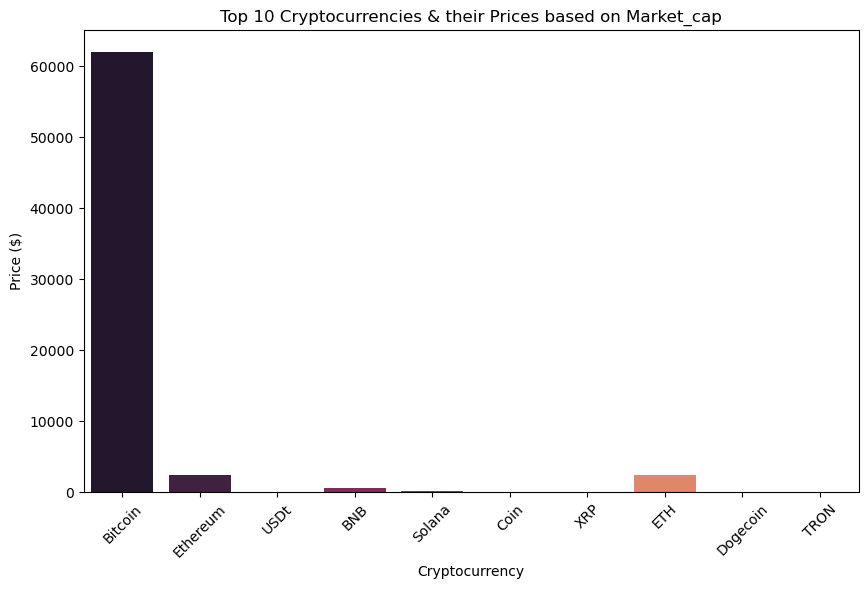

In [7]:
top_10_crypto = df.nlargest(10, 'Market_cap(M)')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Price($)', data=top_10_crypto, palette='rocket')
plt.title('Top 10 Cryptocurrencies & their Prices based on Market_cap')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

#### Insights for above plot:
- The bar chart showcases a striking disparity among the top 10 cryptocurrencies by market cap.
- **Bitcoin (BTC)** is significantly high, priced above 60,000 dollars, while **Ethereum (ETH)** follows distantly at just over 4,000 dollars. 
- The remaining cryptos are priced at a fraction of these two giants, mostly under 500. 
- The chart captures the clear dominance of Bitcoin and Ethereum.

### 2. Plotting Bar Graph - to evaluate top 10 cryptocurrencies based on Market_cap values.

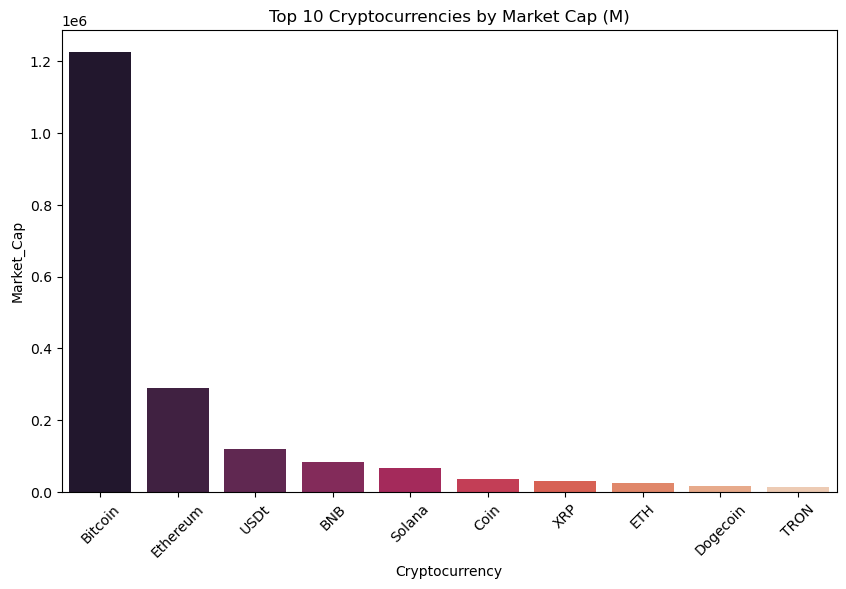

In [8]:
top_10_crypto_market_cap = df.nlargest(10, 'Market_cap(M)')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Market_cap(M)', data=top_10_crypto_market_cap, palette='rocket')
plt.title('Top 10 Cryptocurrencies by Market Cap (M)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market_Cap')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

#### Insights for above plot:
- The graph reveals a dynamic and competitive landscape, with Bitcoin and Ethereum maintaining their dominance while new players are emerging with promising potential.

### 3. Plotting Bar chart - to represent Top 10 Cryptocurrency coins based on their Trade Volume.

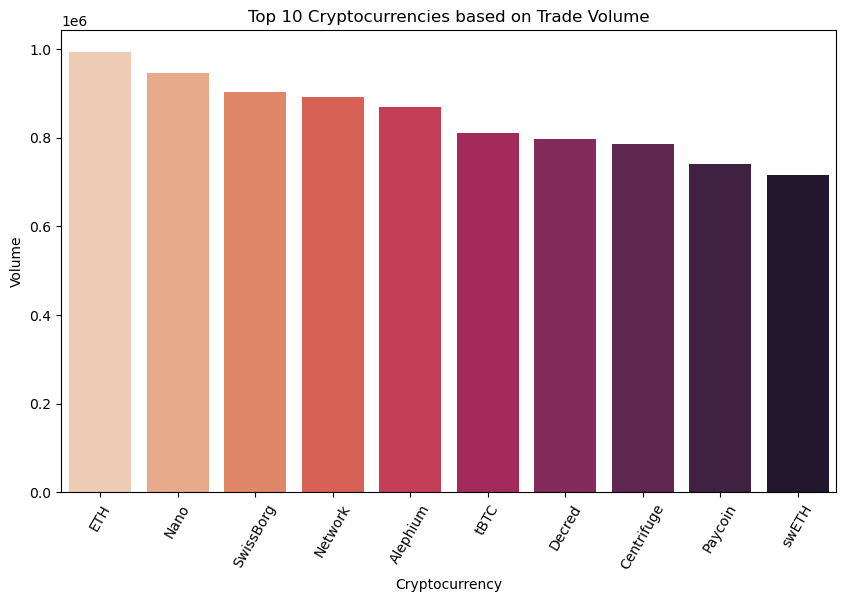

In [9]:
top_10_crypto_trade = df.nlargest(10, 'Volume(M)')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Volume(M)', data=top_10_crypto_trade, palette='rocket_r')
plt.title('Top 10 Cryptocurrencies based on Trade Volume')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume')
plt.xticks(rotation=60)  # Rotate x labels for better readability
plt.show()

#### Insights for above plot:
- **Ethereum** reigns supreme in trade volume, followed by privacy-focused IssBorg and platform-oriented Network.
- Bitcoin, despite its market dominance, trails behind.
- The top 10 showcases a diverse range of cryptocurrencies, from payments to decentralized finance.
- This dynamic market reflects the growing adoption and innovation in the crypto space.

### 4. Histogram - depicting distribution of cryptocurrency coins.

Text(0, 0.5, 'Frequency')

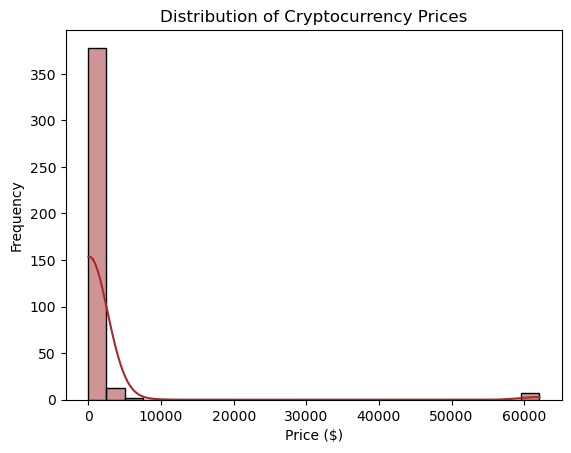

In [5]:
sns.histplot(df['Price($)'], bins=25,color="brown", kde = True)
plt.title("Distribution of Cryptocurrency Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

#### Interpretation:
- The histogram reveals a **right- skewed distribution** of cryptocurrency prices mostly below $10,000, with a concentration at lower values and a **long tail of few high-priced outliers**.
- **Clustering around 0:** A large number of cryptocurrencies have a price close to 0, suggesting that many cryptocurrencies have very low or no value.

### 5. Line Plot
**A line plot to visualize how the Price_Change_Percentage(%) is distributed across different coins.**

Text(0.5, 1.0, 'Price Change Percentage for Cryptocurrencies')

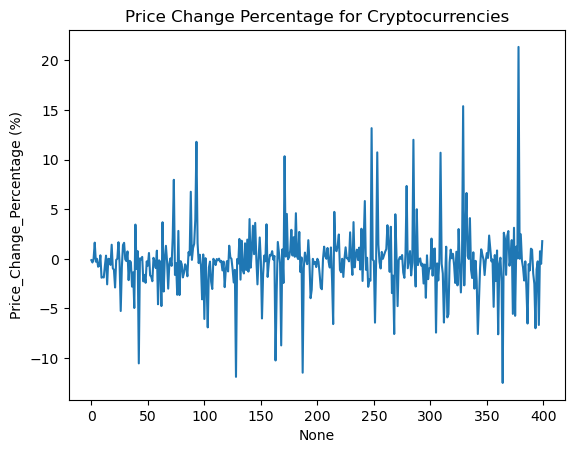

In [11]:
sns.lineplot(x=df.index, y='Price_Change_Percentage (%)', data=df)
plt.title("Price Change Percentage for Cryptocurrencies")

#### Interpretation: We can see which cryptocurrencies are gaining or losing the most in percentage terms.

### 6. Histogram with KDE plot

Text(0.5, 1.0, 'Distribution of Price Change Percentages')

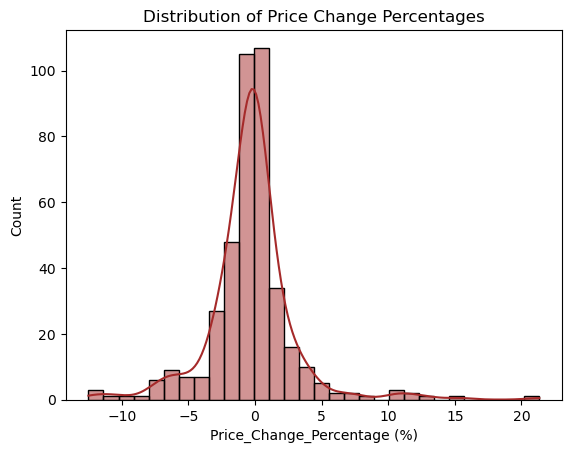

In [14]:
sns.histplot(df['Price_Change_Percentage (%)'], bins=30, kde=True,color="brown")
plt.title('Distribution of Price Change Percentages')

#### Insights: 
The presence of long tails will highlight whether some cryptocurrencies experience extreme volatility, while stablecoins and large-cap coins are likely clustered near 0.

### 7. Bar plots

Text(0.5, 1.0, 'Top 10 Losers')

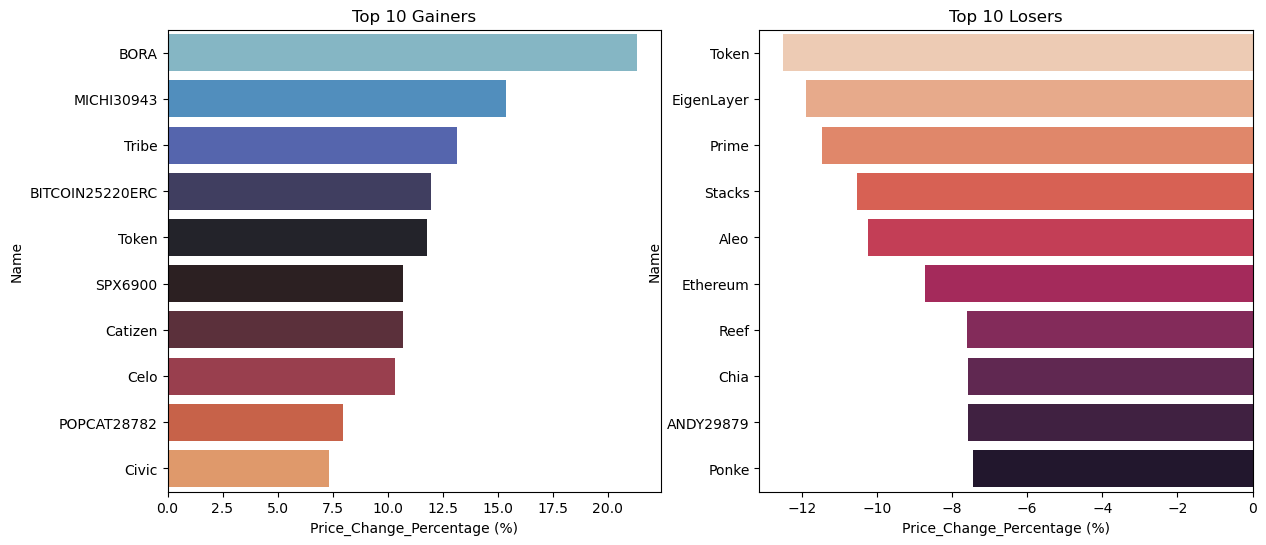

In [23]:
top_gainers = df.nlargest(10, 'Price_Change_Percentage (%)')
top_losers = df.nsmallest(10, 'Price_Change_Percentage (%)')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Price_Change_Percentage (%)', y='Name', data=top_gainers, ax=ax[0],palette="icefire")
sns.barplot(x='Price_Change_Percentage (%)', y='Name', data=top_losers, ax=ax[1],palette="rocket_r")
ax[0].set_title('Top 10 Gainers')
ax[1].set_title('Top 10 Losers')

#### Key Observations:
**Top 10 Gainers:**
- The cryptocurrency with the highest price change percentage is BORA, followed by MICH130943 and Tribe.
- The gains range from around 5% to 20%.
- The color scheme indicates a gradient from light orange to sky blue, representing increasing gains.

**Top 10 Losers:**
- The cryptocurrency with the largest price drop is Ponke, followed by ANDY29879 and Chia.
- The losses range from around 2% to 12%.
- The color scheme indicates a gradient from light orange to dark purple, representing increasing losses.
  
*Overall, the graphs provide a snapshot of the top-performing and least-performing cryptocurrencies based on their price changes during a specific period.*

### 8. Boxplot
- Displays the distribution of price changes for the top cryptocurrencies by market cap which helps in understanding price volatility across the most valuable coins.

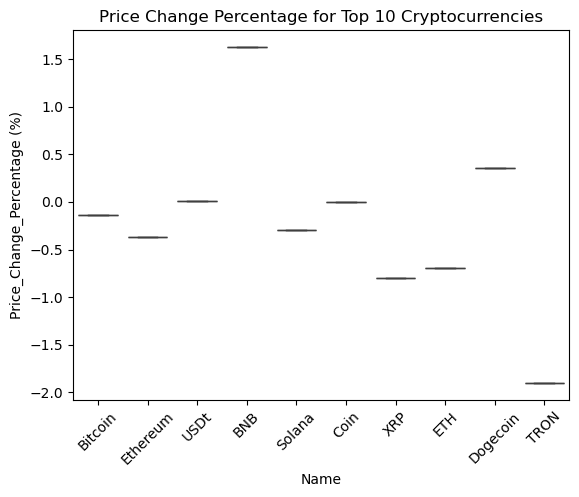

In [15]:
top_10_marketcap = df.nlargest(10, 'Market_cap(M)')
sns.boxplot(x='Name', y='Price_Change_Percentage (%)', data=top_10_marketcap)
plt.title('Price Change Percentage for Top 10 Cryptocurrencies')
plt.xticks(rotation=45)
plt.show()

**Interpretation:** This shows the volatility for each of the top coins, with the spread of price changes. Bitcoin, for example, might show less volatility, while smaller top-10 coins could display greater variation.

### 9. Bar plot

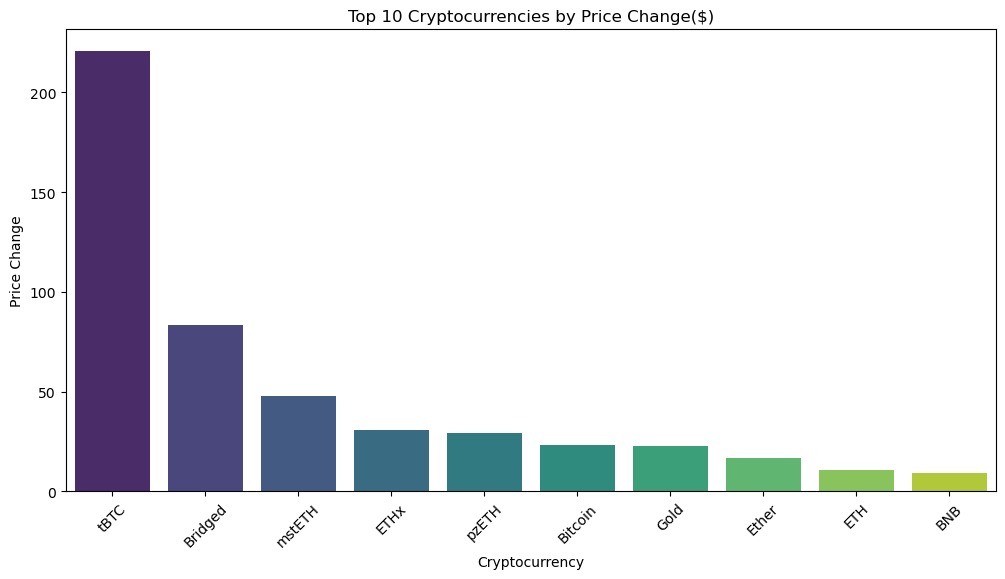

In [17]:
top_10_crypto_price_change = df.nlargest(10, 'Price_Change($)')

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Price_Change($)', data=top_10_crypto_price_change, palette='viridis')
plt.title('Top 10 Cryptocurrencies by Price Change($)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()

#### Insights:
The graph illustrates the top-performing cryptocurrencies in terms of price appreciation.

### 10. Scatter plot - illustrating the relation between Trade Volume vs Price of Crypto coins.

Text(0.5, 1.0, 'Volume vs Price')

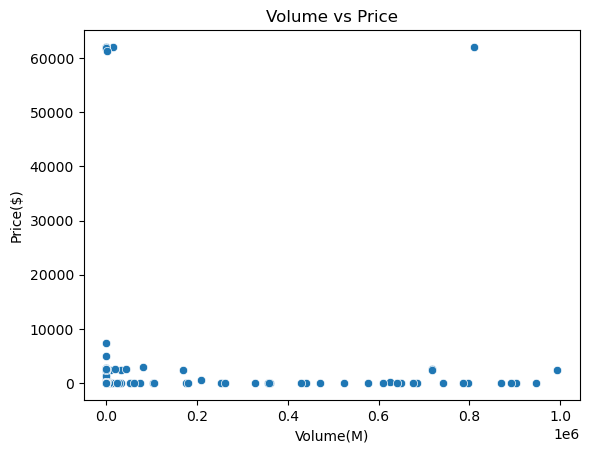

In [18]:
sns.scatterplot(x='Volume(M)', y='Price($)', data=df)
plt.title('Volume vs Price')

#### Interpretation:
- This plot helps in understanding the liquidity of cryptocurrencies and whether high volume correlates with higher or lower prices.
- It also helps to identify liquid assets, coins with low prices but high volumes, indicating they're frequently traded.
- Stablecoins might show high volume despite low prices.

#### Defining a function to group the coins based on Market capitalization.

In [19]:
def market_cap_tier(market_cap):
    if market_cap > 10000:  # Adjust the thresholds as necessary
        return 'Large Cap'
    elif market_cap > 1000:
        return 'Mid Cap'
    else:
        return 'Small Cap'

df['Market_Cap_Tier'] = df['Market_cap(M)'].apply(market_cap_tier)

In [20]:
df["Market_Cap_Tier"].value_counts()

Market_Cap_Tier
Small Cap    316
Mid Cap       68
Large Cap     16
Name: count, dtype: int64

In [21]:
market_tier_circulating_supply = df.groupby("Market_Cap_Tier")[["Price($)","Circulating_Supply(M)"]].mean()
market_tier_circulating_supply

,Price($),Circulating_Supply(M)
Market_Cap_Tier,,
Large Cap,4401.935159,3.686486e+07
Mid Cap,2126.636238,7.417820e+06
Small Cap,956.963520,4.978454e+08


### 11. Bar plot - based on market cap tiers.

Text(0.5, 1.0, 'Average Circulating Supply(M) of Cryptocurrencies by Market Cap Tier')

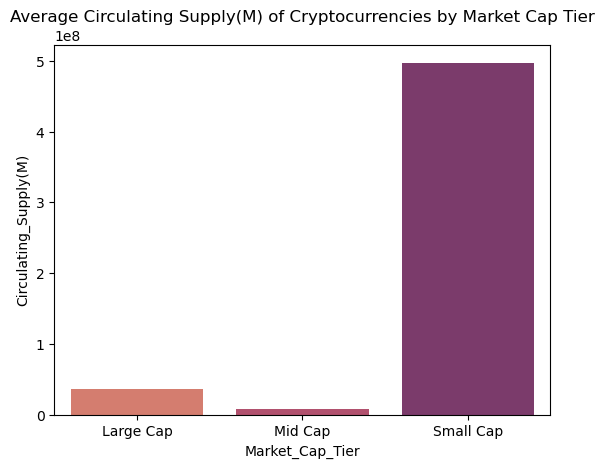

In [22]:
sns.barplot(x=market_tier_circulating_supply.index, y=market_tier_circulating_supply['Circulating_Supply(M)'],palette="flare")
plt.title('Average Circulating Supply(M) of Cryptocurrencies by Market Cap Tier')

#### Key Observations:
- Mid Cap cryptocurrencies have the lowest average circulating supply.
- Small Cap cryptocurrencies have the highest average circulating supply, significantly surpassing the other two tiers.
- Large Cap cryptocurrencies have an average circulating supply that falls between Mid Cap and Small Cap.
  
Overall, the graph illustrates a clear relationship between market cap tier and average circulating supply. As the market cap tier increases, the average circulating supply generally decreases. This suggests that larger cap cryptocurrencies tend to have a smaller portion of their total supply circulating in the market compared to smaller cap cryptocurrencies.

In [24]:
df.head()

,Name,Symbol,Price($),Price_Change($),Market_cap(M),Volume(M),Circulating_Supply(M),Price_Change_Percentage (%),Market_Cap_Tier
0,Bitcoin,BTC,62024.280000,-87.450000,1226000.0,15596.0,19.763,-0.141,Large Cap
1,Ethereum,ETH,2409.750000,-8.950000,290074.0,8529.0,120.375,-0.371,Large Cap
2,USDt,USDT,0.999998,0.000125,119642.0,31790.0,119642.000,0.013,Large Cap
3,BNB,BNB,563.700000,9.170000,82261.0,1425.0,145.932,1.627,Large Cap
4,Solana,SOL,142.710000,-0.420000,66874.0,1238.0,468.598,-0.294,Large Cap


### 12. Bar graph - depicting Average prices based on tier division

Text(0.5, 1.0, 'Average Price of Cryptocurrencies by Market Cap Tier')

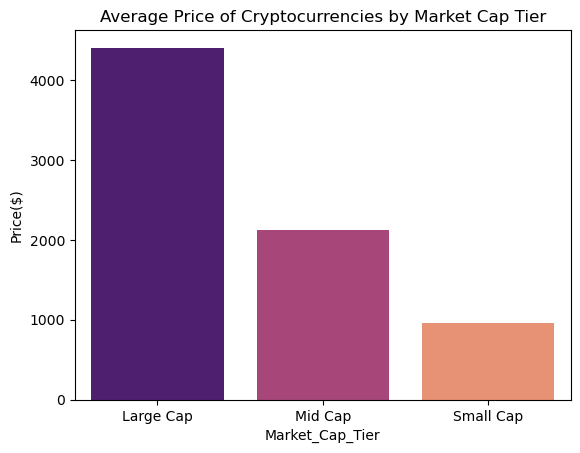

In [25]:
market_tier_summary = df.groupby('Market_Cap_Tier')[["Price($)"]].mean()
sns.barplot(x=market_tier_summary.index, y=market_tier_summary['Price($)'],palette="magma")
plt.title('Average Price of Cryptocurrencies by Market Cap Tier')

#### Insight: The bar graph shows that the average price of cryptocurrencies increases with their market capitalization tier. Large Cap cryptocurrencies have the highest average price, followed by Mid Cap and Small Cap.

#### Categorising based on Trade Volume

In [26]:
def volume_category(volume):
    if volume > 10000:
        return 'High Volume'
    elif volume > 1000:
        return 'Medium Volume'
    else:
        return 'Low Volume'

df['Volume_Category'] = df['Volume(M)'].apply(volume_category)

In [27]:
df['Volume_Category'].value_counts()

Volume_Category
Low Volume       345
High Volume       46
Medium Volume      9
Name: count, dtype: int64

### 13. Bar plot -  based on Trade Volume Categories.

Text(0.5, 1.0, 'Average Price Change by Volume Category')

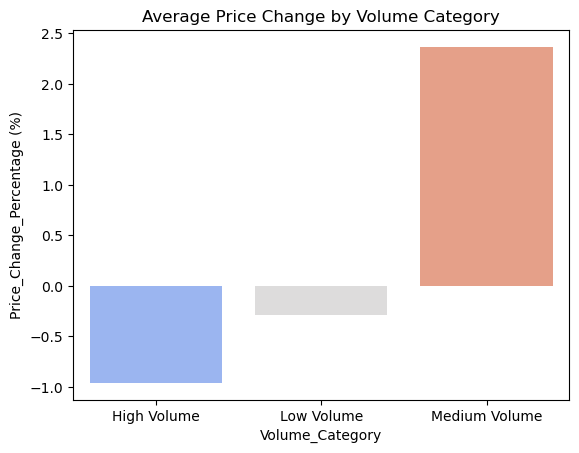

In [29]:
volume_summary = df.groupby('Volume_Category')[["Price_Change_Percentage (%)"]].mean()
sns.barplot(x=volume_summary.index, y=volume_summary['Price_Change_Percentage (%)'],palette="coolwarm")
plt.title('Average Price Change by Volume Category')

#### Key Insights:
- **High Volume cryptocurrencies** have a negative average price change, indicating that they tend to lose value over time.
- **Low Volume cryptocurrencies** have a slightly negative average price change, but it's closer to zero compared to High Volume cryptocurrencies.
- **Medium Volume cryptocurrencies** have a positive average price change, suggesting that they tend to gain value over time.

        Overall, the graph suggests that there is a relationship between trading volume and price performance. Cryptocurrencies with higher trading volumes tend to lose value, while those with lower trading volumes have a more neutral or slightly positive price performance.

### 14. HeatMap
- Heatmaps cannot display a large number of cryptocurrencies but can aggregate their behaviour across selected metrics. Instead of using names, heatmap is displayed with coins by grouping them into bins based on price ranges or volume ranges.

Text(0.5, 1.0, 'Heatmap of Cryptocurrency Price vs Volume')

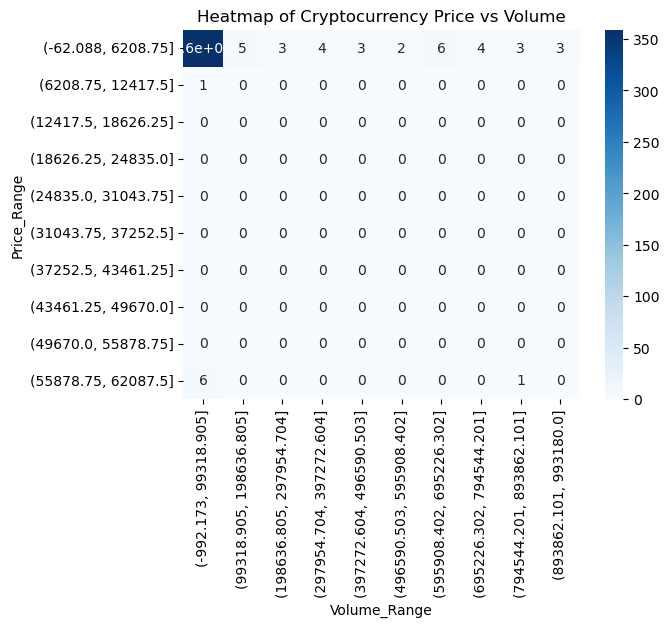

In [30]:
df['Price_Range'] = pd.cut(df['Price($)'], bins=10)
df['Volume_Range'] = pd.cut(df['Volume(M)'], bins=10)

heatmap_data = df.groupby(['Price_Range', 'Volume_Range']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of Cryptocurrency Price vs Volume')

#### Interpretation: 
      The heatmap suggests that the majority of cryptocurrencies have relatively low prices and trading volumes. There is no clear relationship between price and volume, indicating that factors other than trading volume might be influencing cryptocurrency prices.

### 15. Logarithmic Scales
- Some metrics like price and market cap can vary dramatically between cryptocurrencies. Using logarithmic scales for certain metrics can help normalize extreme values and make comparisons easier.
- Advantage: Log scales are great for visualizing data that spans several orders of magnitude, which is common in cryptocurrency markets (e.g., comparing Bitcoin to smaller altcoins).

Text(0.5, 1.0, 'Logarithmic Scale: Price vs Market Cap')

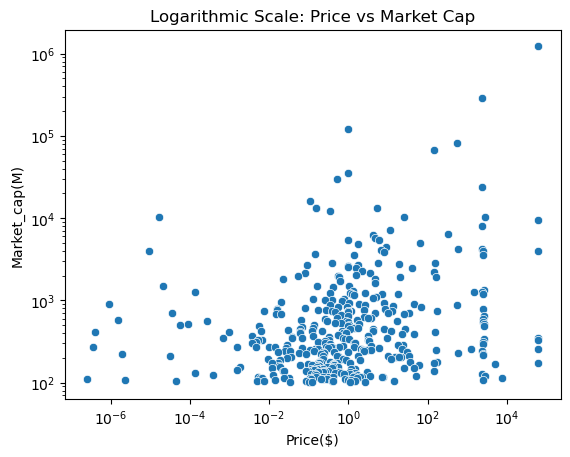

In [31]:
sns.scatterplot(x='Price($)', y='Market_cap(M)', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Logarithmic Scale: Price vs Market Cap')

#### Observations:
The scatter plot suggests a **complex relationship** between price and market cap for cryptocurrencies. While there is no clear linear relationship, the clustering of data points and the presence of outliers indicate that there might be underlying patterns and factors influencing this relationship.

### 16. Heatmap - To perform Multi-variate analysis

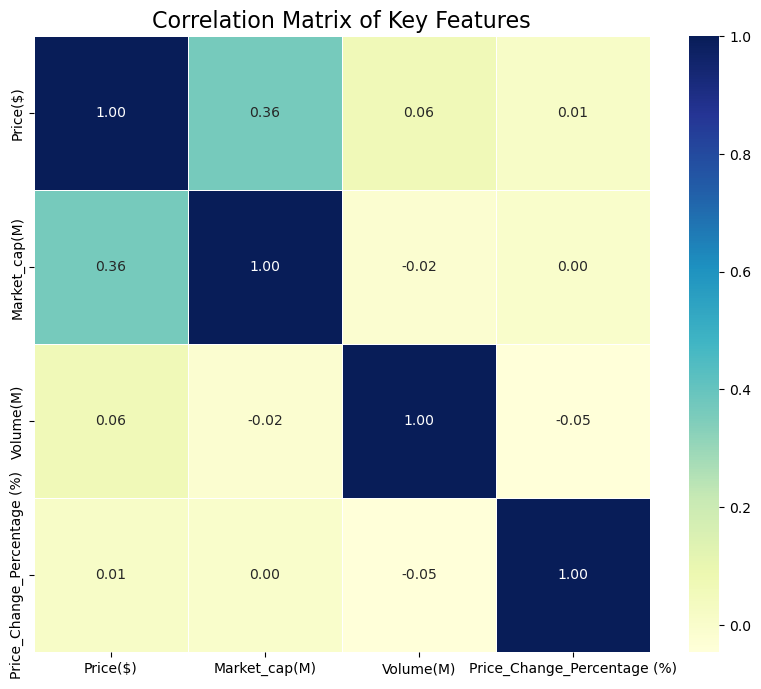

In [6]:
# Custom function for log transformation with safety for non-positive values
def safe_log_transform(column):
    return np.log1p(column)

# 1. Log Transformation for Price, Market Cap, and Volume
df['Log_Price'] = safe_log_transform(df['Price($)'])
df['Log_Market_Cap'] = safe_log_transform(df['Market_cap(M)'])
df['Log_Volume'] = safe_log_transform(df['Volume(M)'])

# 2. Z-Score Standardization for Price, Market Cap, and Volume
scaler = StandardScaler()
df[['Z_Price', 'Z_Market_Cap', 'Z_Volume']] = scaler.fit_transform(df[['Price($)', 'Market_cap(M)', 'Volume(M)']] )

# 3. Clipping Outliers in Price and Market Cap
df['Clipped_Price'] = df['Price($)'].clip(upper=df['Price($)'].quantile(0.99))
df['Clipped_Market_Cap'] = df['Market_cap(M)'].clip(upper=df['Market_cap(M)'].quantile(0.99))

# 4. Rank Transformation for Price and Market Cap
df['Price_Rank'] = df['Price($)'].rank(ascending=False)
df['Market_Cap_Rank'] = df['Market_cap(M)'].rank(ascending=False)

# 5. Plot: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Price($)', 'Market_cap(M)', 'Volume(M)', 'Price_Change_Percentage (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.show()

#### Insights:
The correlation matrix reveals moderate positive correlations between price and market capitalization, while other variable pairs exhibit weak correlations. However, these relationships are not substantial, indicating a lack of strong causal connections.

### 17. Bar Plot illustrating top volatile currencies by price change %.

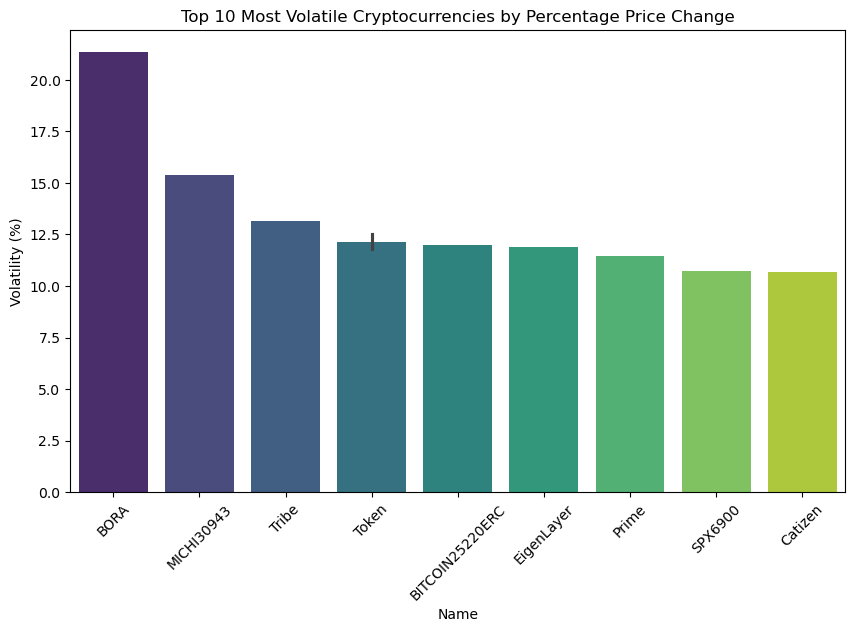

In [9]:
# Calculate volatility as the absolute percentage price change
df['Volatility'] = df['Price_Change_Percentage (%)'].abs()

# Sort by volatility
top_volatile = df.nlargest(10, 'Volatility')

# Plotting the most volatile cryptocurrencies
plt.figure(figsize=(10, 6))
sns.barplot(data=top_volatile, x='Name', y='Volatility', palette='viridis')
plt.title('Top 10 Most Volatile Cryptocurrencies by Percentage Price Change')
plt.xticks(rotation=45)
plt.ylabel('Volatility (%)')
plt.show()

#### Interpretation:
- **BORA** is the most volatile cryptocurrency with a percentage price change of approximately **20%**.
- **MICHI30943 and Tribe** follow closely behind with percentage price changes around **15% and 13%,** respectively.
- The remaining cryptocurrencies in the top 10 have percentage price changes ranging from **10% to 12%**.
- The overall volatility of the cryptocurrencies in the top 10 is **relatively high**, indicating significant price fluctuations.
- The color scheme used in the plot helps to visually differentiate the cryptocurrencies based on their volatility levels.

### 18. Bar plot - illustrating Composite Score
- Ranking Coins by Composite Indices. Instead of showing individual metrics for 400 coins, we created a composite score or index based on key metrics (e.g., a score that combines price, market cap, and volatility) and rank coins by this score.
- Advantage: A composite score combines several metrics into a single, easy-to-compare value.

Text(0.5, 1.0, 'Top 10 Cryptocurrencies by Composite Score')

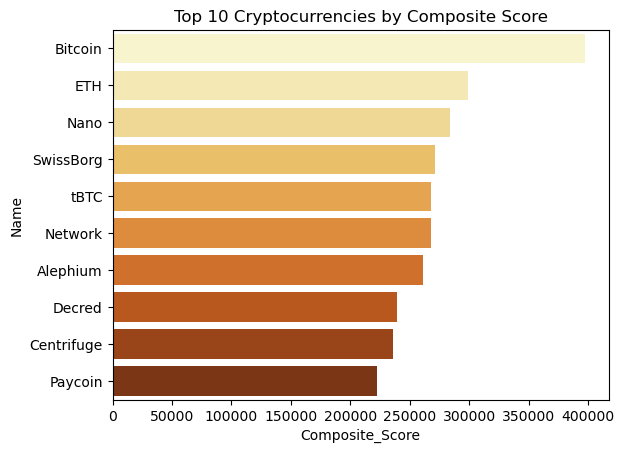

In [4]:
df['Composite_Score'] = df['Price($)']*0.4 + df['Market_cap(M)']*0.3 + df['Volume(M)']*0.3
top_10_composite = df.nlargest(10, 'Composite_Score')

sns.barplot(x='Composite_Score', y='Name', data=top_10_composite,palette="YlOrBr")
plt.title('Top 10 Cryptocurrencies by Composite Score')

#### Key Insights:
**This chart ranks the top 10 cryptocurrencies by a Composite Score, which blends price (40%), market cap (30%), and trading volume (30%).**
1. **Bitcoin** claims the top spot with the highest composite score, excelling in price, market cap, and trading volume. **ETH and Nano** follow in second and third, proving their strong market presence.

2. **SwissBorg, tBTC, and Network** hold the middle ground, while Alephium, Decred, Centrifuge, and Paycoin round out the list in the lower half. The gradient from light yellow to dark brown visually emphasizes this ranking.

This chart offers a clear snapshot of the top 10 cryptocurrencies, combining multiple factors into a single score, helping you quickly see which ones dominate across key metrics and which lag behind.

## *Conclusion*

#### A comprehensive analysis of the provided graphs reveals several key insights into the cryptocurrency market:

**1. Market Leadership**: Bitcoin's dominance in the market is undeniable, consistently leading in market capitalization and price appreciation. Ethereum also maintains a strong position, underscoring its significance.

**2. Price Volatility**: The cryptocurrency market is characterized by significant price fluctuations. This dynamic nature presents both opportunities and risks for investors, emphasizing the need for careful risk assessment and diversification.

**3. Market Cap and Price Correlation**: While there is a general correlation between market capitalization and price, suggesting that larger cap cryptocurrencies tend to command higher prices, this relationship is not always straightforward. Exceptions and outliers highlight the complexity of the market.

**4. Trading Volume and Price Dynamics**: The relationship between trading volume and price performance is multifaceted. While higher trading volume might not guarantee price gains, it can signal increased interest and liquidity, potentially influencing price movements.

**5. Cryptocurrency Distribution**: The distribution of cryptocurrency prices is skewed towards the lower end, with a majority of cryptocurrencies having relatively low prices. This concentration is accompanied by a smaller number of high-priced outliers, indicating a market dominated by a few larger cap cryptocurrencies.

**6. Performance Diversity**: The performance of cryptocurrencies varies widely, with some experiencing substantial gains while others suffer losses. This underscores the importance of thorough analysis and a diversified investment approach to navigate the market effectively.

***Future Prospects***: The cryptocurrency market is a rapidly evolving landscape, influenced by regulatory developments, technological advancements, and market sentiment. As such, its future trajectory remains uncertain, necessitating continuous monitoring and adaptation.

        In conclusion, the cryptocurrency market is a dynamic and complex ecosystem, offering both opportunities and challenges. Investors must carefully assess the risks and rewards before investing and stay informed about the latest market trends and developments.